In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statannot
from adjustText import adjust_text
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu

# set mpl style for pdf text rendering
plt.rcParams['pdf.fonttype'] = 42

In [3]:
# Set color palette for regions
region_colors = {
	'Florida': '#1b9e77',
	'Tokyo': '#d95f02',
	'Thailand': '#7570b3',
}

In [4]:
os.chdir('/Users/bebr1814/projects/chuong_bees/analysis')

In [5]:
stats = pd.read_csv('sequencing_stats_summary.csv')
stats

,Sample ID,Region,Barcode,Number of reads,Mean read length,Read length N50,Total bases,Est. Coverage (X),Assembly N50 (wc),Largest Contig (wc),Assembly Size (wc),BUSCO Identity (wc),Assembly N50 (nc),Largest Contig (nc),Assembly Size (nc),BUSCO Identity (nc)
0,Florida 1,Florida,10,"917,457","3,911","6,640","3,588,535,825",15.95,"28,708","188,471","192,658,005",82.50%,"494,543","2,566,366","226,981,331",98.20%
1,Florida 2,Florida,1,"1,216,216","3,579","5,909","4,352,965,883",19.35,"32,149","554,208","207,873,668",78.90%,"751,233","4,980,596","240,711,160",98.10%
2,Florida 3,Florida,2,"5,397,671","1,693","3,202","9,135,843,496",40.60,"14,849","179,407","157,907,441",72.70%,"1,875,745","5,736,877","229,079,865",98.60%
3,Florida 4,Florida,3,"1,811,392","2,435","5,101","4,411,554,097",19.61,"23,319","173,158","190,699,987",82.20%,"1,059,700","5,668,269","233,502,362",98.50%
4,Tokyo 1,Tokyo,11,"563,409","2,563","6,018","1,443,930,322",6.42,"9,925","212,056","37,616,093",15.70%,"46,269","329,831","203,449,879",82.40%
5,Tokyo 2,Tokyo,6,"3,632,905","3,342","5,562","12,142,395,038",53.97,"3,060,999","9,979,090","234,294,921",98.60%,"3,214,613","9,996,044","225,085,554",98.70%
6,Tokyo 3,Tokyo,7,"1,190,143","2,440","4,503","2,904,334,118",12.91,"10,207","94,892","79,833,434",30.30%,"229,788","1,406,795","225,203,940",96.50%
7,Thailand 1,Thailand,12,"873,282","2,793","4,510","2,439,180,465",10.84,"8,412","187,525","37,342,679",20.50%,"62,612","509,783","222,423,314",91.50%
8,Thailand 2,Thailand,4,"3,437,412","3,660","5,229","12,581,534,044",55.92,"2,719,339","9,630,287","234,521,627",98.60%,"3,582,957","10,009,228","224,785,838",98.70%
9,Thailand 4,Thailand,5,"665,819","4,484","7,040","2,985,480,838",13.27,"22,582","155,224","164,563,915",69.40%,"162,295","1,059,558","227,423,634",95.20%


In [6]:
# grab the subset of individual samples with correction (wc)
stats_ = stats.iloc[:10,0:8]
stats = pd.concat([stats_, stats.iloc[:10,12:16]], axis=1)

In [7]:
stats['BUSCO Identity (nc)'] = stats['BUSCO Identity (nc)'].str.rstrip('%').astype('float')
# values are comma-delimited numbers as strings, convert to floats
stats.iloc[:,3:7] = stats.iloc[:,3:7].apply(lambda x: x.str.replace(',', '').astype(float))
stats.iloc[:,8:11] = stats.iloc[:,8:11].apply(lambda x: x.str.replace(',', '').astype(float))

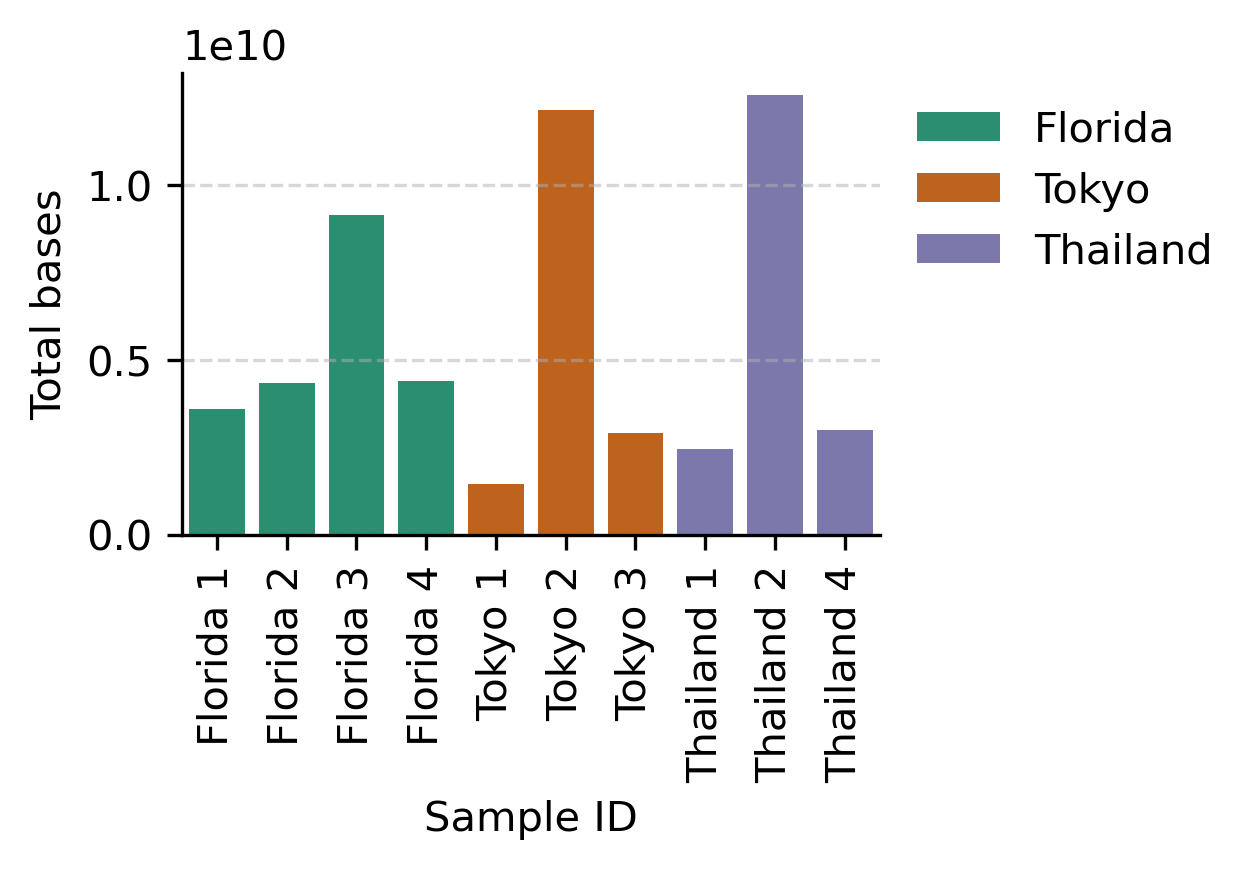

In [28]:
# Plot simple read length n50 vs total bases
fig, ax = plt.subplots(dpi=300,figsize=(3,2))

sns.barplot(data=stats, y='Total bases', x='Sample ID', hue='Region', palette=region_colors, ax=ax)
plt.xticks(rotation=90, ha='center')
plt.legend(frameon=False, loc='upper left', bbox_to_anchor=(1,1))
ax.grid(axis='y', linestyle='--', alpha=0.5)

sns.despine()

plt.savefig('sequencing_stats_total_bases.pdf', bbox_inches='tight')
plt.savefig('sequencing_stats_total_bases.png', bbox_inches='tight', dpi=300)

plt.show()

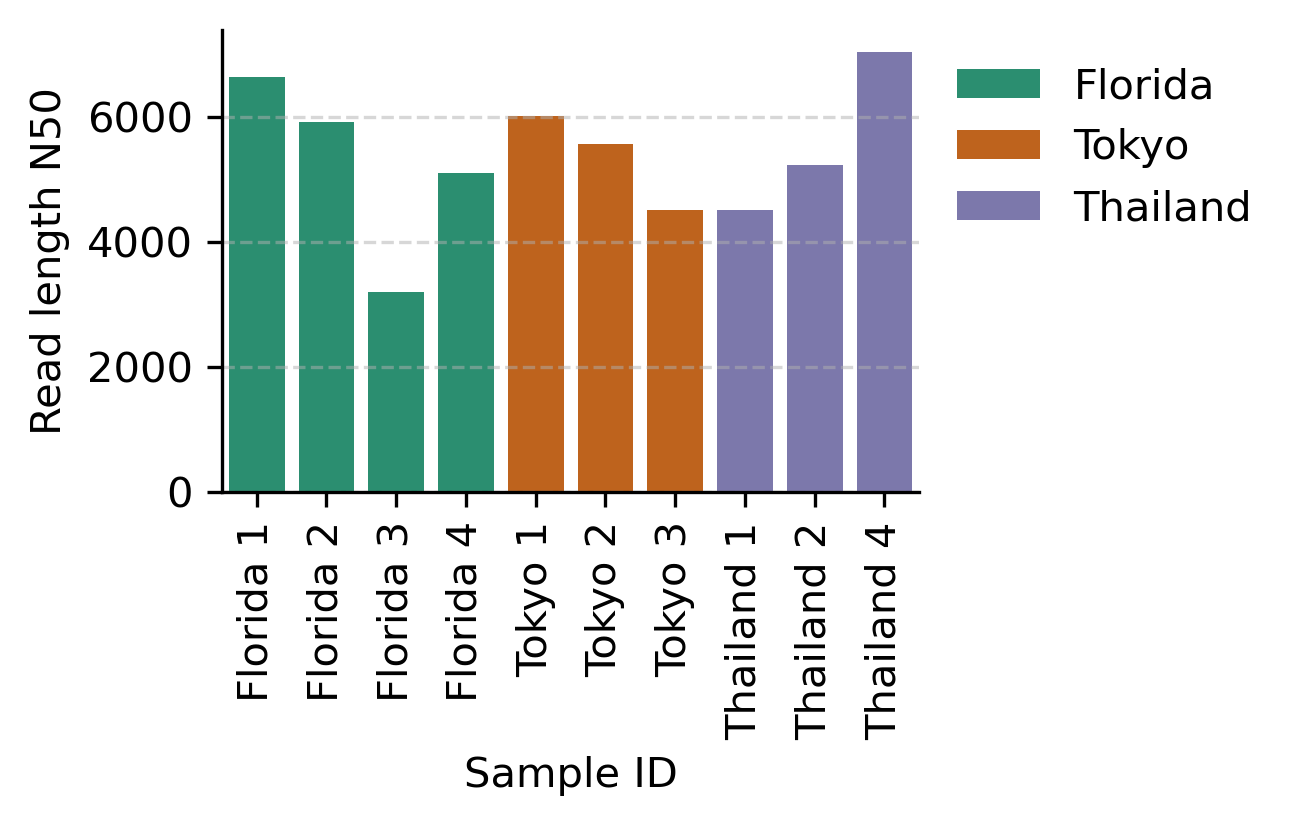

In [29]:
# Plot simple read length n50 vs total bases
fig, ax = plt.subplots(dpi=300,figsize=(3,2))

sns.barplot(data=stats, y='Read length N50', x='Sample ID', hue='Region', palette=region_colors, ax=ax)
plt.xticks(rotation=90, ha='center')
plt.legend(frameon=False, loc='upper left', bbox_to_anchor=(1,1))
ax.grid(axis='y', linestyle='--', alpha=0.5)

sns.despine()

plt.savefig('sequencing_stats_readlen_n50.pdf', bbox_inches='tight')
plt.savefig('sequencing_stats_readlen_n50.png', bbox_inches='tight', dpi=300)

plt.show()

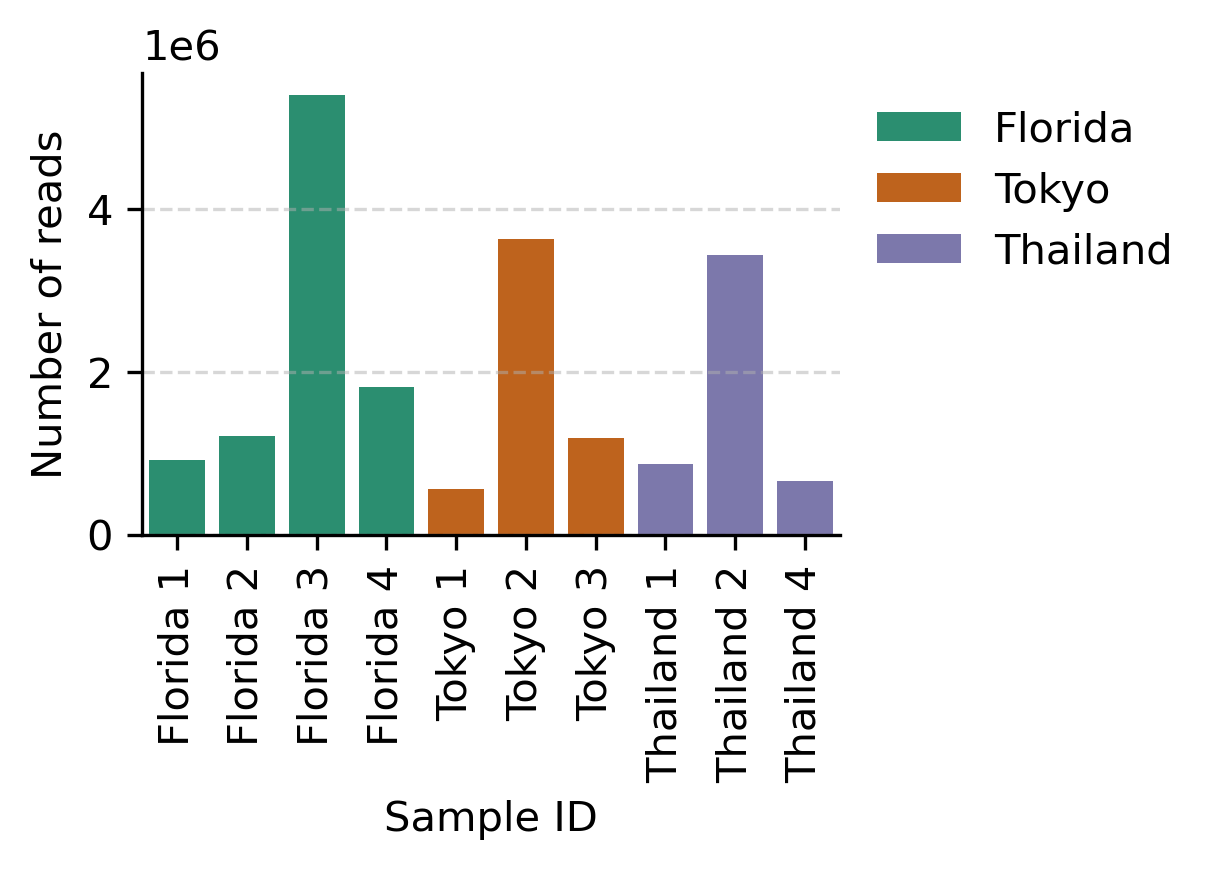

In [30]:
# Plot simple read length n50 vs total bases
fig, ax = plt.subplots(dpi=300,figsize=(3,2))

sns.barplot(data=stats, y='Number of reads', x='Sample ID', hue='Region', palette=region_colors, ax=ax)
plt.xticks(rotation=90, ha='center')
plt.legend(frameon=False, loc='upper left', bbox_to_anchor=(1,1))
ax.grid(axis='y', linestyle='--', alpha=0.5)

sns.despine()

plt.savefig('sequencing_stats_num_reads.pdf', bbox_inches='tight')
plt.savefig('sequencing_stats_num_reads.png', bbox_inches='tight', dpi=300)

plt.show()

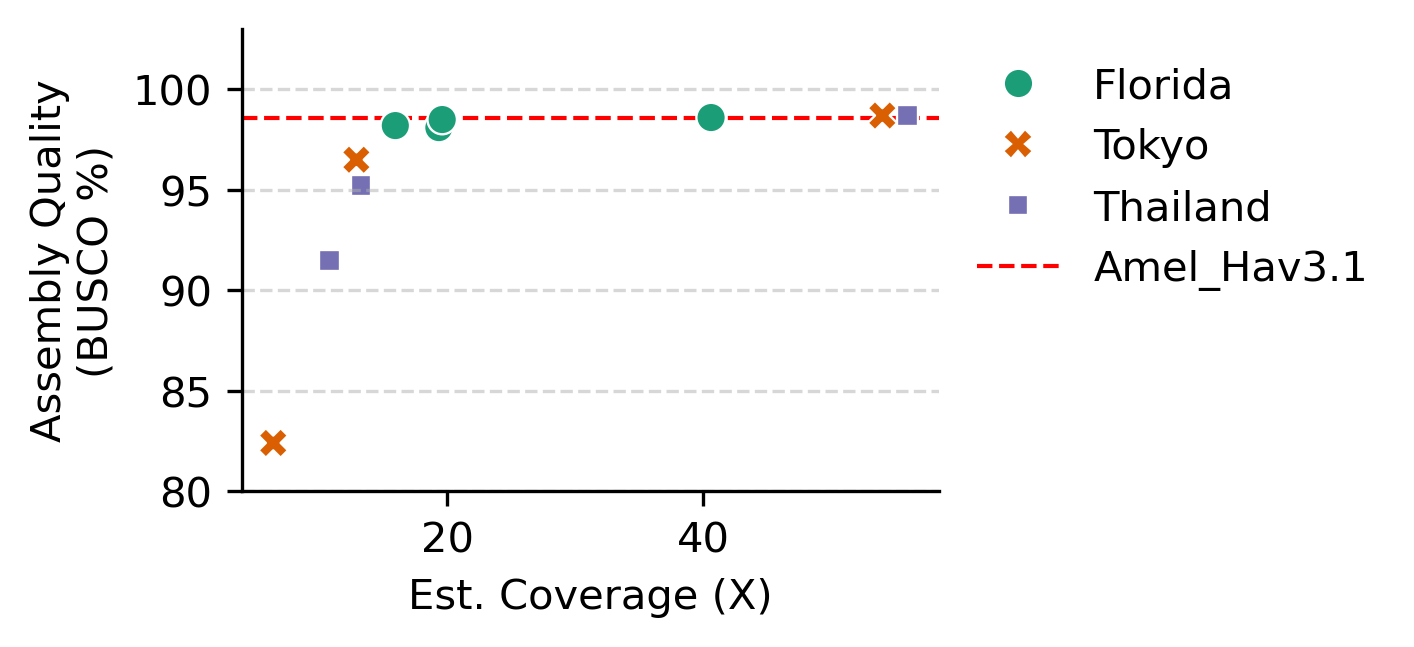

In [16]:
# Plot estimated coverage against BUSCO
fig, ax = plt.subplots(figsize=(3,2),dpi=300)
sns.scatterplot(x='Est. Coverage (X)', y='BUSCO Identity (nc)', data=stats, ax=ax, style='Region', hue='Region', s=50, palette=region_colors)
ax.set_ylabel('Assembly Quality\n(BUSCO %)', fontstyle='normal')
ax.set_ylim(80,103)
ax.axhline(98.6,color='red',linestyle='--',linewidth=1, zorder=0)
# italic
# ax.text(15, 99.5, 'Amel_Hav3.1 Reference Genome', color='red', ha='left',va='bottom',fontsize=6,fontstyle='italic')
# add red line element for legend
ax.plot([],[],color='red',linestyle='--',linewidth=1,label='Amel_Hav3.1')
plt.legend(frameon=False, bbox_to_anchor=(1,1), loc='upper left')
# add light grid
ax.grid(axis='y', linestyle='--', alpha=0.5)
sns.despine()
plt.savefig('coverage_vs_busco.pdf', bbox_inches='tight')
plt.savefig('coverage_vs_busco.png', bbox_inches='tight', dpi=300)
plt.show()

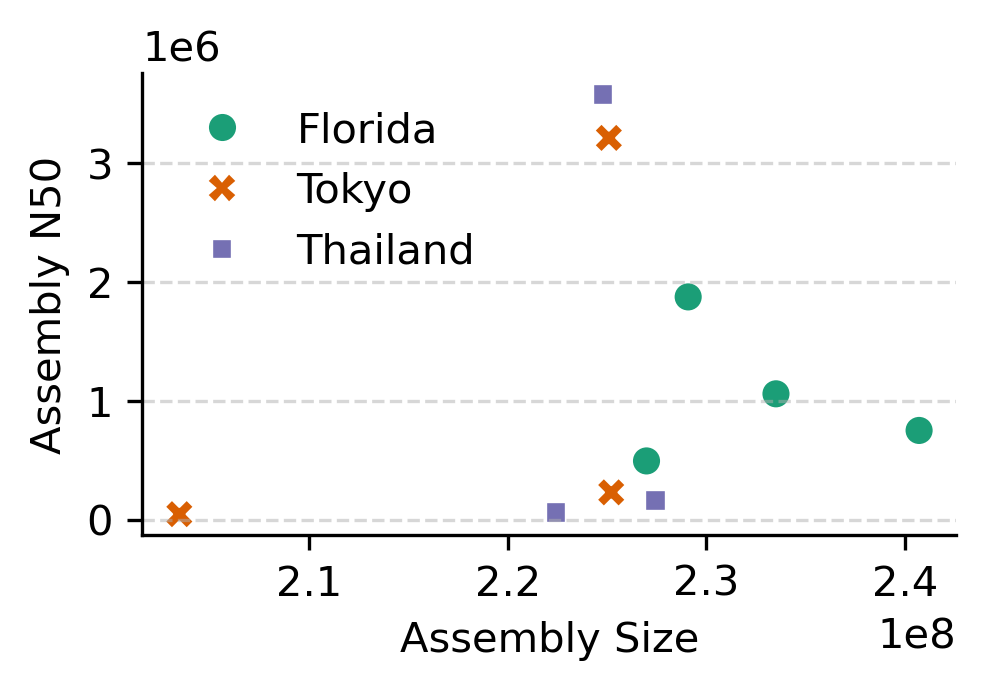

In [15]:
# Plot estimated coverage against BUSCO
fig, ax = plt.subplots(figsize=(3.5,2),dpi=300)
sns.scatterplot(x='Assembly Size (nc)', y='Assembly N50 (nc)', data=stats, ax=ax, style='Region', hue='Region', s=50, palette=region_colors)
ax.set_xlabel('Assembly Size', fontstyle='normal')
ax.set_ylabel('Assembly N50', fontstyle='normal')
# ax.set_ylim(80,103)
plt.legend(frameon=False)
# add light grid
ax.grid(axis='y', linestyle='--', alpha=0.5)
sns.despine()
plt.savefig('size_vs_asm_n50.pdf', bbox_inches='tight')
plt.savefig('size_vs_asm_n50.png', bbox_inches='tight', dpi=300)
plt.show()

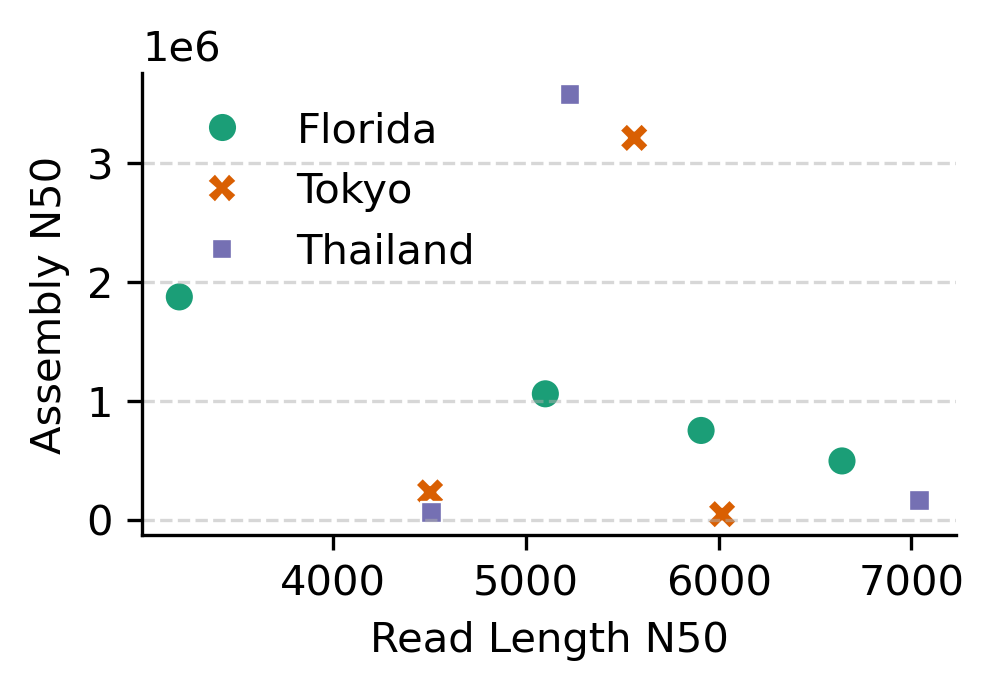

In [14]:
# Plot estimated coverage against BUSCO
fig, ax = plt.subplots(figsize=(3.5,2),dpi=300)
sns.scatterplot(x='Read length N50', y='Assembly N50 (nc)', data=stats, ax=ax, style='Region', hue='Region', s=50, palette=region_colors)
ax.set_xlabel('Read Length N50', fontstyle='normal')
ax.set_ylabel('Assembly N50', fontstyle='normal')
# ax.set_ylim(80,103)
plt.legend(frameon=False)
# add light grid
ax.grid(axis='y', linestyle='--', alpha=0.5)
sns.despine()
plt.savefig('read_n50_vs_asm_n50.pdf', bbox_inches='tight')
plt.savefig('read_n50_vs_asm_n50.png', bbox_inches='tight', dpi=300)
plt.show()

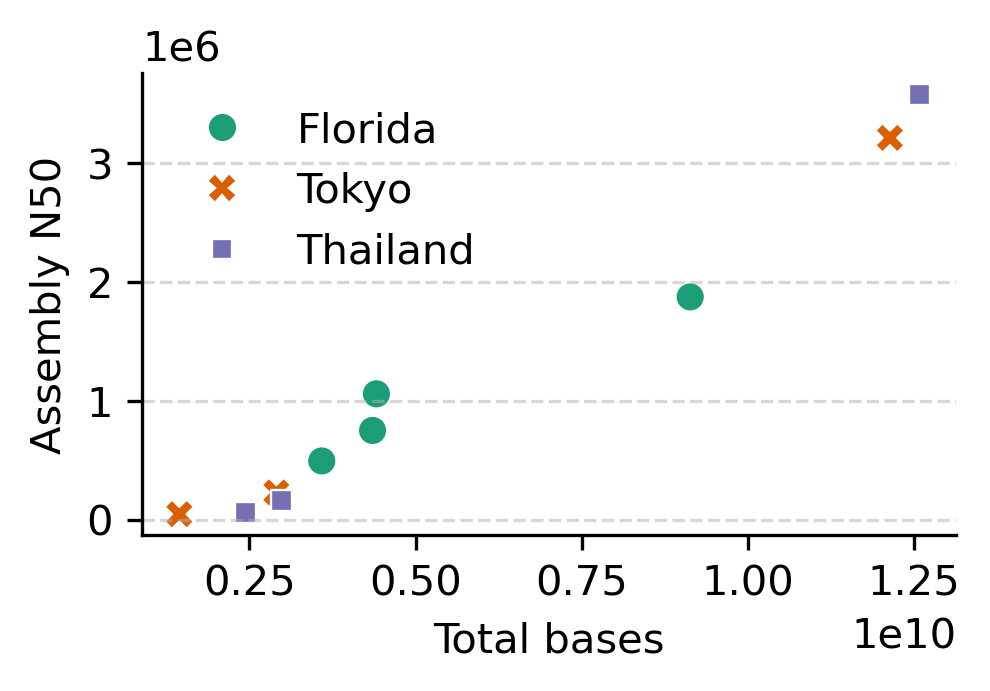

In [13]:
# Plot estimated coverage against BUSCO
fig, ax = plt.subplots(figsize=(3.5,2),dpi=300)
sns.scatterplot(x='Total bases', y='Assembly N50 (nc)', data=stats, ax=ax, style='Region', hue='Region', s=50, palette=region_colors)
ax.set_xlabel('Total bases', fontstyle='normal')
ax.set_ylabel('Assembly N50', fontstyle='normal')
# ax.set_ylim(80,103)
plt.legend(frameon=False)
# add light grid
ax.grid(axis='y', linestyle='--', alpha=0.5)
sns.despine()
plt.savefig('total_bases_vs_asm_n50.pdf', bbox_inches='tight')
plt.savefig('total_bases_vs_asm_n50.png', bbox_inches='tight', dpi=300)
plt.show()

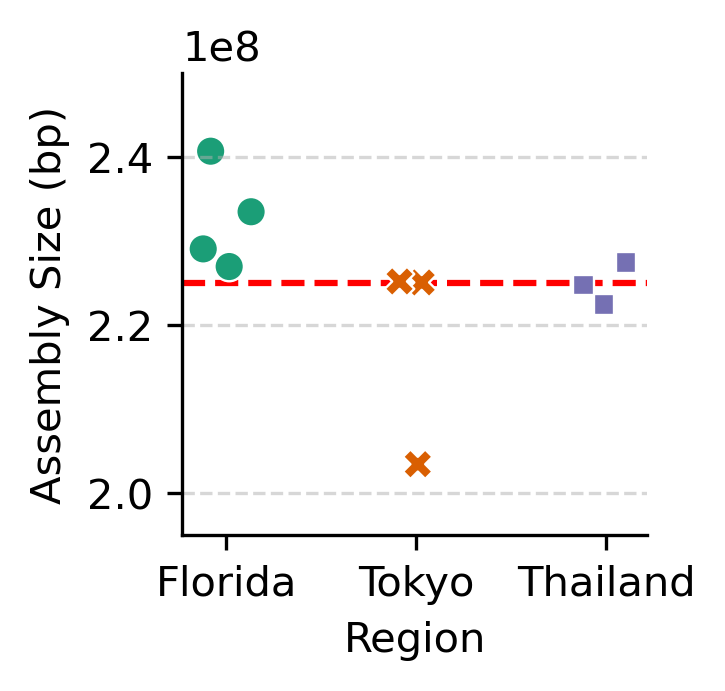

In [12]:
unique_regions = stats['Region'].unique()
region_map = {region: i for i, region in enumerate(unique_regions)}

# Convert categorical x-values to numerical indices with jitter
jitter_strength = 0.15  # Adjust for better separation
stats['x_jittered'] = stats['Region'].map(region_map) + np.random.uniform(-jitter_strength, jitter_strength, len(stats))

# Plot
fig, ax = plt.subplots(figsize=(2,2), dpi=300)

# Scatterplot with jittered x-values
sns.scatterplot(x='x_jittered', y='Assembly Size (nc)', data=stats, ax=ax, s=50, hue='Region', style='Region', palette=region_colors)

# Adjust x-axis labels back to categorical names
ax.set_xticks(list(region_map.values()))
ax.set_xticklabels(list(region_map.keys()))
ax.set_xlabel('Region', fontstyle='normal')
ax.set_ylabel('Assembly Size (bp)', fontstyle='normal')

ax.set_ylim(1.95e8,2.5e8)

# add line at y=2.25e8 to mark ref genome size
ax.axhline(2.25e8, color='red', linestyle='--', alpha=1, zorder=0)

# Grid and formatting
ax.grid(axis='y', linestyle='--', alpha=0.5)
sns.despine()
plt.legend().remove()
plt.savefig('asm_size_by_region.pdf', bbox_inches='tight')
plt.savefig('asm_size_by_region.png', bbox_inches='tight', dpi=300)
plt.show()

In [17]:
stats

,Sample ID,Region,Barcode,Number of reads,Mean read length,Read length N50,Total bases,Est. Coverage (X),Assembly N50 (nc),Largest Contig (nc),Assembly Size (nc),BUSCO Identity (nc),x_jittered
0,Florida 1,Florida,10,917457.0,3911.0,6640.0,3588535825.0,15.95,494543.0,2566366.0,226981331.0,98.2,0.014808
1,Florida 2,Florida,1,1216216.0,3579.0,5909.0,4352965883.0,19.35,751233.0,4980596.0,240711160.0,98.1,-0.082729
2,Florida 3,Florida,2,5397671.0,1693.0,3202.0,9135843496.0,40.60,1875745.0,5736877.0,229079865.0,98.6,-0.121818
3,Florida 4,Florida,3,1811392.0,2435.0,5101.0,4411554097.0,19.61,1059700.0,5668269.0,233502362.0,98.5,0.130209
4,Tokyo 1,Tokyo,11,563409.0,2563.0,6018.0,1443930322.0,6.42,46269.0,329831.0,203449879.0,82.4,1.007847
5,Tokyo 2,Tokyo,6,3632905.0,3342.0,5562.0,12142395038.0,53.97,3214613.0,9996044.0,225085554.0,98.7,1.028361
6,Tokyo 3,Tokyo,7,1190143.0,2440.0,4503.0,2904334118.0,12.91,229788.0,1406795.0,225203940.0,96.5,0.911814
7,Thailand 1,Thailand,12,873282.0,2793.0,4510.0,2439180465.0,10.84,62612.0,509783.0,222423314.0,91.5,1.987781
8,Thailand 2,Thailand,4,3437412.0,3660.0,5229.0,12581534044.0,55.92,3582957.0,10009228.0,224785838.0,98.7,1.879824
9,Thailand 4,Thailand,5,665819.0,4484.0,7040.0,2985480838.0,13.27,162295.0,1059558.0,227423634.0,95.2,2.103617


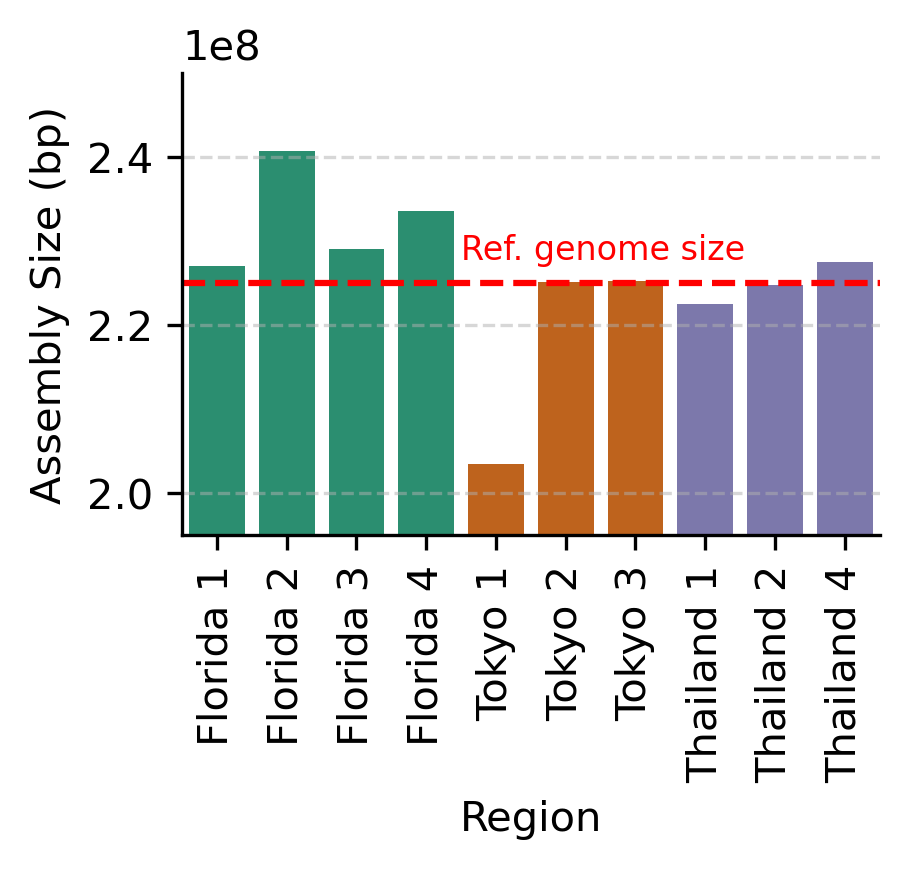

In [18]:
# Plot
fig, ax = plt.subplots(figsize=(3,2), dpi=300)

# make each sample a separate bar
sns.barplot(x='Sample ID', y='Assembly Size (nc)', data=stats, ax=ax, hue='Region', dodge=False, palette=region_colors)

plt.xticks(rotation=90)

ax.set_xlabel('Region', fontstyle='normal')
ax.set_ylabel('Assembly Size (bp)', fontstyle='normal')

ax.set_ylim(1.95e8,2.5e8)

# add line at y=2.25e8 to mark ref genome size
ax.axhline(2.25e8, color='red', linestyle='--')
ax.text(3.5, 2.27e8, 'Ref. genome size', color='red', ha='left', va='bottom', fontsize=8)

# Grid and formatting
ax.grid(axis='y', linestyle='--', alpha=0.5)
sns.despine()
plt.legend().remove()
plt.savefig('asm_size_by_region_bars.pdf', bbox_inches='tight')
plt.savefig('asm_size_by_region_bars.png', bbox_inches='tight', dpi=300)
plt.show()

# Sniffles variant calls against Amel_Hav3.1

In [19]:
sniffles_path = '/Users/bebr1814/projects/chuong_bees/data/20250211_1135_P2S-00613-A_PBA08559_66fdcccd/uncorrected_fastq/alignments_amelhav3.1/sniffles_variants'
# sniffles_path = '/Users/bebr1814/projects/chuong_bees/data/20250211_1135_P2S-00613-A_PBA08559_66fdcccd/uncorrected_fastq/assembly_alignments_amelhav3.1/sniffles_variants'

import glob
sniffles_files = glob.glob(sniffles_path + '/*.vcf')

sniffles_files

['/Users/bebr1814/projects/chuong_bees/data/20250211_1135_P2S-00613-A_PBA08559_66fdcccd/uncorrected_fastq/alignments_amelhav3.1/sniffles_variants/tokyo2.vcf',
 '/Users/bebr1814/projects/chuong_bees/data/20250211_1135_P2S-00613-A_PBA08559_66fdcccd/uncorrected_fastq/alignments_amelhav3.1/sniffles_variants/tokyo3.vcf',
 '/Users/bebr1814/projects/chuong_bees/data/20250211_1135_P2S-00613-A_PBA08559_66fdcccd/uncorrected_fastq/alignments_amelhav3.1/sniffles_variants/florida3.vcf',
 '/Users/bebr1814/projects/chuong_bees/data/20250211_1135_P2S-00613-A_PBA08559_66fdcccd/uncorrected_fastq/alignments_amelhav3.1/sniffles_variants/thailand4.vcf',
 '/Users/bebr1814/projects/chuong_bees/data/20250211_1135_P2S-00613-A_PBA08559_66fdcccd/uncorrected_fastq/alignments_amelhav3.1/sniffles_variants/florida2.vcf',
 '/Users/bebr1814/projects/chuong_bees/data/20250211_1135_P2S-00613-A_PBA08559_66fdcccd/uncorrected_fastq/alignments_amelhav3.1/sniffles_variants/florida4.vcf',
 '/Users/bebr1814/projects/chuong_bee

In [20]:
import re

def parse_vcf(vcf_file):
    stats = {
        "sample": vcf_file.split("/")[-1].replace(".vcf", ""), 
        "total_variants": 0, "DEL": 0, "INS": 0, "DUP": 0, "INV": 0, "TRA": 0, 
        "AVG_QUAL": 0, "SVLEN_MEAN": 0, "SVLEN_MEDIAN": 0, 
        "SUPPORT_MEAN": 0, "SUPPORT_MEDIAN": 0, 
        "CHROM_COUNT": {}
    }
    
    qual_scores = []
    svlen_values = []
    support_values = []
    
    with open(vcf_file, "r") as f:
        for line in f:
            if line.startswith("#"):
                continue
            cols = line.strip().split("\t")
            chrom, qual, info = cols[0], cols[5], cols[7]
            
            # Track chromosome counts
            stats["CHROM_COUNT"][chrom] = stats["CHROM_COUNT"].get(chrom, 0) + 1
            
            # Count total variants
            stats["total_variants"] += 1
            
            # Extract SVTYPE
            match_svtype = re.search(r"SVTYPE=([^;]+)", info)
            if match_svtype:
                svtype = match_svtype.group(1)
                if svtype in stats:
                    stats[svtype] += 1
            
            # Extract QUAL
            if qual != ".":
                qual_scores.append(float(qual))
            
            # Extract SVLEN
            match_svlen = re.search(r"SVLEN=(-?\d+)", info)
            if match_svlen:
                svlen_values.append(abs(int(match_svlen.group(1))))
            
            # Extract SUPPORT (if present, useful for filtering later)
            match_support = re.search(r"SUPPORT=(\d+)", info)
            if match_support:
                support_values.append(int(match_support.group(1)))
    
    # Compute statistics
    stats["AVG_QUAL"] = sum(qual_scores) / len(qual_scores) if qual_scores else 0
    if svlen_values:
        stats["SVLEN_MEAN"] = sum(svlen_values) / len(svlen_values)
        stats["SVLEN_MEDIAN"] = sorted(svlen_values)[len(svlen_values) // 2]
    if support_values:
        stats["SUPPORT_MEAN"] = sum(support_values) / len(support_values)
        stats["SUPPORT_MEDIAN"] = sorted(support_values)[len(support_values) // 2]

    return stats


In [21]:

snif_stats_list = [parse_vcf(vcf) for vcf in sniffles_files]
snif_stats = pd.DataFrame(snif_stats_list)
snif_stats['region'] = snif_stats['sample'].str[:-1]
snif_stats['sample'] = snif_stats['sample'].apply(lambda x: x[:-1].capitalize() + ' ' + x[-1])
snif_stats


,sample,total_variants,DEL,INS,DUP,INV,TRA,AVG_QUAL,SVLEN_MEAN,SVLEN_MEDIAN,SUPPORT_MEAN,SUPPORT_MEDIAN,CHROM_COUNT,region
0,Tokyo 2,15235,8051,7055,70,38,0,59.254283,405.313330,153,23.876666,20,"{'NC_037638.1': 1724, 'NC_037639.1': 456, 'NC_...",tokyo
1,Tokyo 3,14382,7569,6403,58,56,0,59.296065,7849.721071,145,5.808858,5,"{'NC_037638.1': 1653, 'NC_037639.1': 521, 'NC_...",tokyo
2,Florida 3,20937,11247,9529,104,41,0,59.319434,515.366808,146,13.730525,11,"{'NC_037638.1': 2431, 'NC_037639.1': 642, 'NC_...",florida
3,Thailand 4,14905,7477,6600,47,53,0,59.397652,13159.416872,148,6.506609,5,"{'NC_037638.1': 1699, 'NC_037639.1': 544, 'NC_...",thailand
4,Florida 2,18921,10005,8730,46,38,0,59.446435,985.048940,145,7.993711,6,"{'NC_037638.1': 2433, 'NC_037639.1': 641, 'NC_...",florida
5,Florida 4,19399,10145,9097,56,42,0,59.481829,1869.676784,142,8.096500,7,"{'NC_037638.1': 2064, 'NC_037639.1': 661, 'NW_...",florida
6,Thailand 1,14590,7158,6030,64,92,0,59.369088,28158.655650,140,4.970391,4,"{'NC_037638.1': 1701, 'NC_037639.1': 498, 'NC_...",thailand
7,Tokyo 1,9827,5169,4392,23,35,0,59.256029,7659.770974,138,3.875445,3,"{'NC_037638.1': 1198, 'NC_037639.1': 331, 'NC_...",tokyo
8,Thailand 2,15588,8227,7223,79,41,0,59.277970,378.215222,152,24.800295,21,"{'NC_037638.1': 1782, 'NC_037639.1': 498, 'NC_...",thailand
9,Florida 1,18953,9845,8730,40,43,0,59.459083,2187.293761,145,7.700892,6,"{'NC_037638.1': 2310, 'NC_037639.1': 632, 'NC_...",florida


/tmp/ipykernel_53313/2985320434.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=variant_counts.index, y=variant_counts.values, palette=palette)


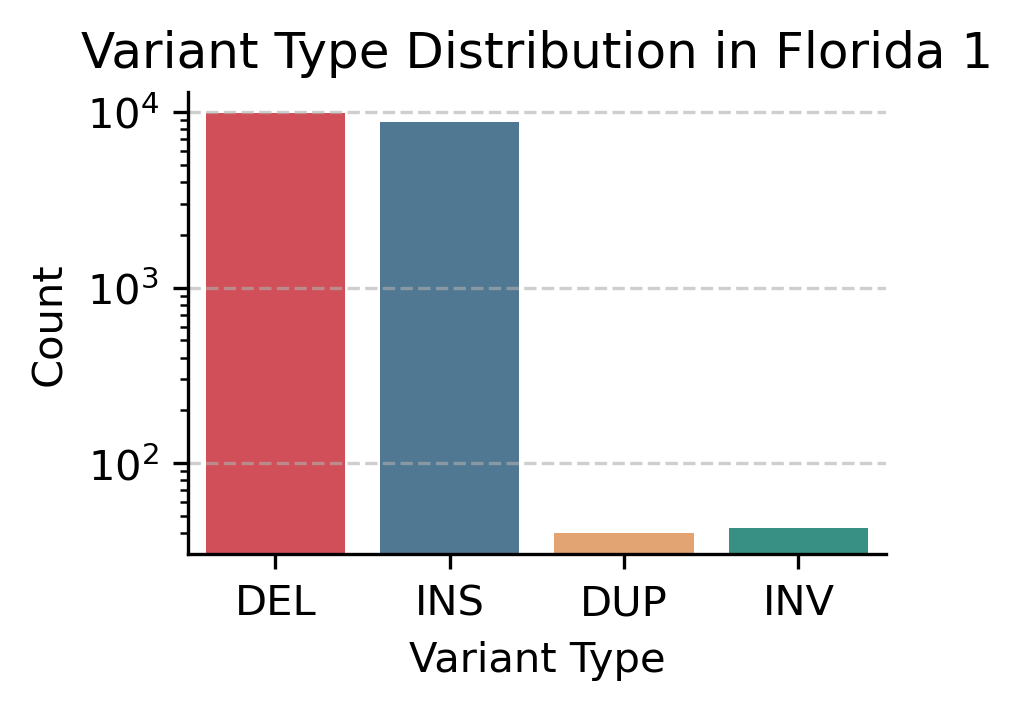

In [26]:
def plot_variant_distribution(sample_name):
	sample_data = snif_stats[snif_stats["sample"] == sample_name].iloc[0]
	variant_counts = sample_data[["DEL", "INS", "DUP", "INV"]]

	palette = {
		'DEL': '#E63946',
		'INS': '#457B9D',
		'DUP': '#F4A261',
		'INV': '#2A9D8F',
	}
	
	fig, ax = plt.subplots(figsize=(3,2), dpi=300)
	sns.barplot(x=variant_counts.index, y=variant_counts.values, palette=palette)
	
	plt.xlabel("Variant Type")
	plt.ylabel("Count")
	plt.title(f"Variant Type Distribution in {sample_name}")
	plt.grid(axis="y", linestyle="--", alpha=0.6)

	ax.set_yscale('log')

	sns.despine()

	plt.savefig(f"variant_distribution.{sample_name}.pdf", bbox_inches="tight")
	plt.savefig(f"variant_distribution.{sample_name}.png", bbox_inches="tight", dpi=300)
	plt.show()

plot_variant_distribution("Florida 1")

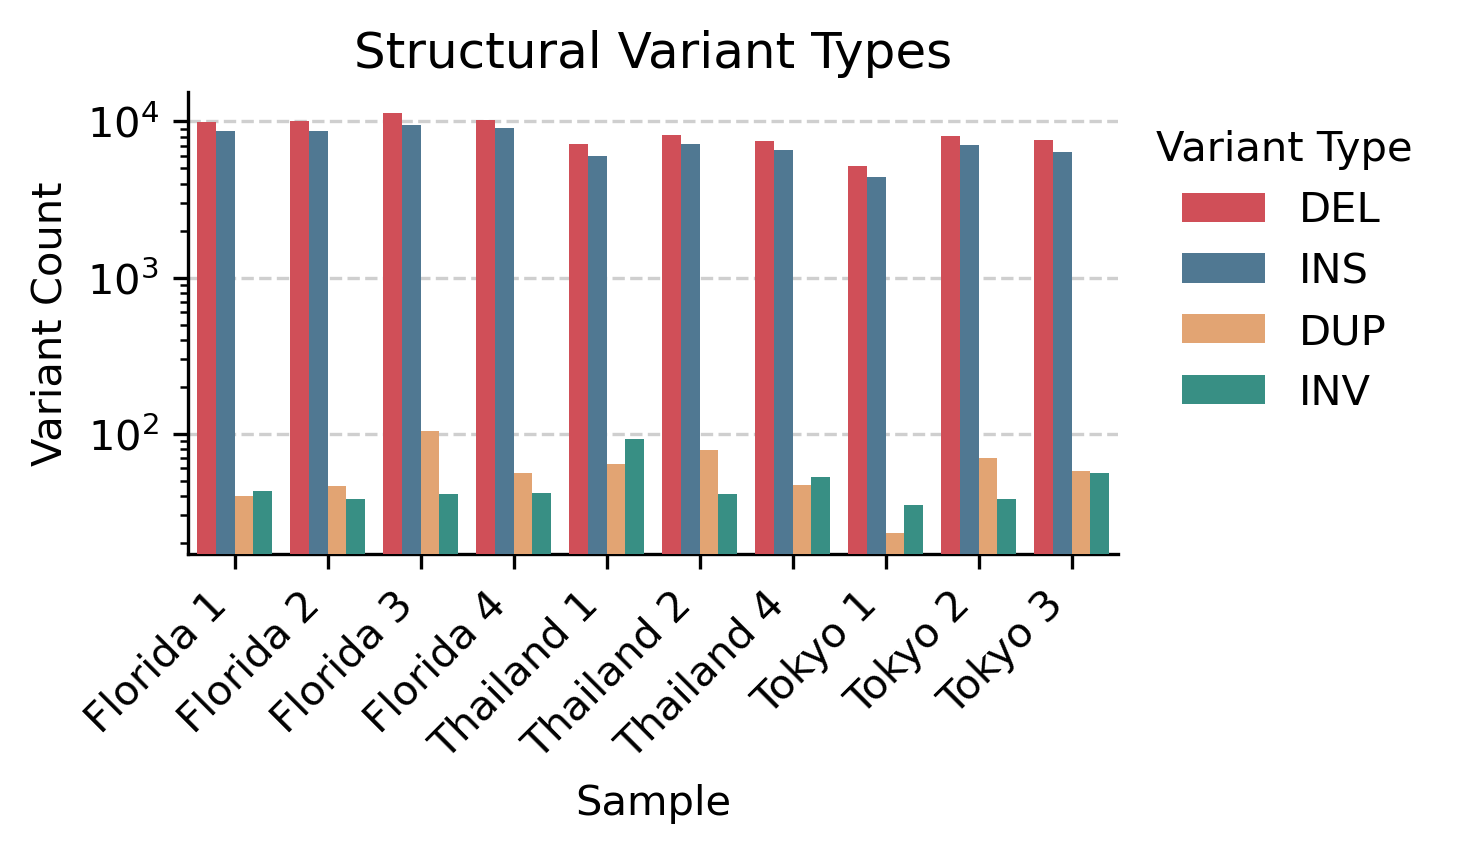

In [24]:
sorted_snif_stats = snif_stats.sort_values(by=["region","sample"])  # Sort by region
melted_df = sorted_snif_stats.melt(id_vars=["sample", "region"], value_vars=["DEL", "INS", "DUP", "INV"], var_name="Variant Type", value_name="Count")

palette = {
	'DEL': '#E63946',
	'INS': '#457B9D',
	'DUP': '#F4A261',
	'INV': '#2A9D8F',
}

fig, ax = plt.subplots(figsize=(4,2), dpi=300)
sns.barplot(data=melted_df, x="sample", y="Count", hue="Variant Type", palette=palette, zorder=999)

plt.xlabel("Sample")
plt.ylabel("Variant Count")
plt.title("Structural Variant Types")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.6, zorder=0)


ax.set_yscale('log')
sns.despine()

plt.legend(title="Variant Type", bbox_to_anchor=(1, 1), loc="upper left", frameon=False)

plt.savefig('variant_distribution_all_samples.pdf', bbox_inches='tight')
plt.savefig('variant_distribution_all_samples.png', bbox_inches='tight',dpi=300)
plt.show()


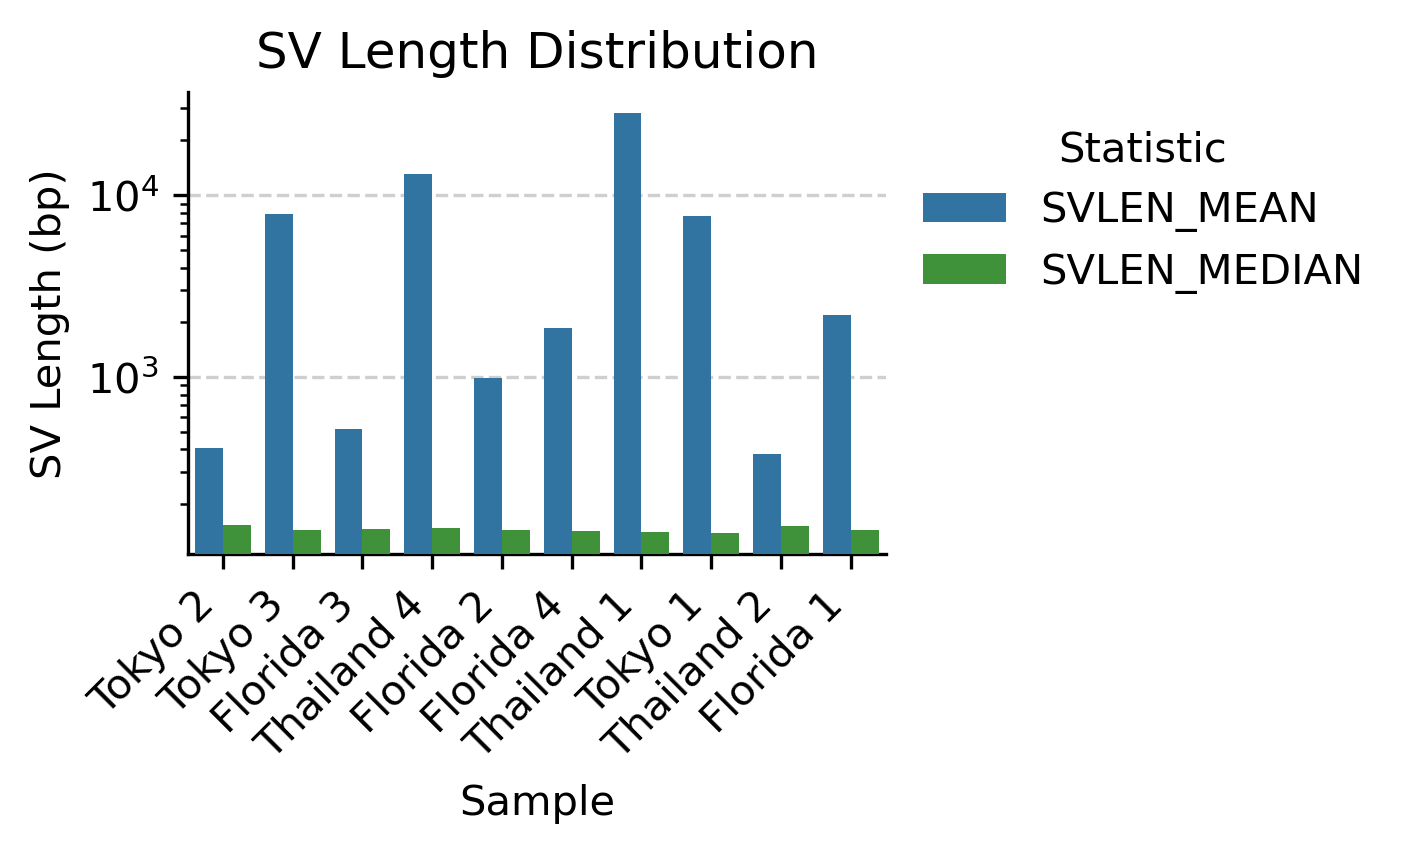

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_svlen_distribution(snif_stats):
    # Convert SVLEN data to long format
    melted_svlen = snif_stats.melt(id_vars=["sample"], value_vars=["SVLEN_MEAN", "SVLEN_MEDIAN"], 
                                   var_name="Statistic", value_name="SVLEN")
    
    # Set color palette
    palette = {
        "SVLEN_MEAN": "#1f78b4",
        "SVLEN_MEDIAN": "#33a02c"
    }

    # Create plot
    fig, ax = plt.subplots(figsize=(3,2), dpi=300)
    sns.barplot(data=melted_svlen, x="sample", y="SVLEN", hue="Statistic", palette=palette, zorder=999)

    # Formatting
    plt.xlabel("Sample")
    plt.ylabel("SV Length (bp)")
    plt.title("SV Length Distribution")
    plt.xticks(rotation=45, ha="right")
    plt.grid(axis="y", linestyle="--", alpha=0.6, zorder=0)
    ax.set_yscale('log')
    
    sns.despine()
    plt.legend(title="Statistic", bbox_to_anchor=(1, 1), loc="upper left", frameon=False)
    
    # Save and show
    plt.savefig('svlen_distribution.pdf', bbox_inches='tight')
    plt.savefig('svlen_distribution.png', bbox_inches='tight', dpi=300)
    plt.show()

plot_svlen_distribution(snif_stats)


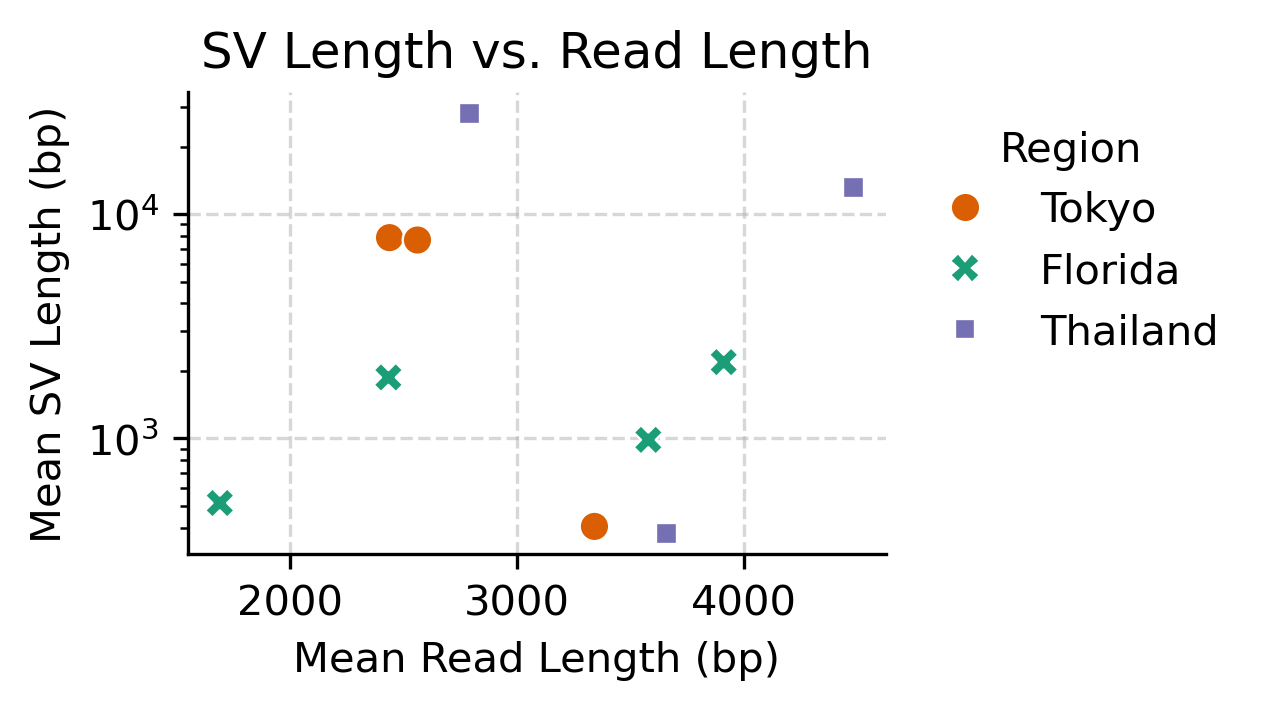

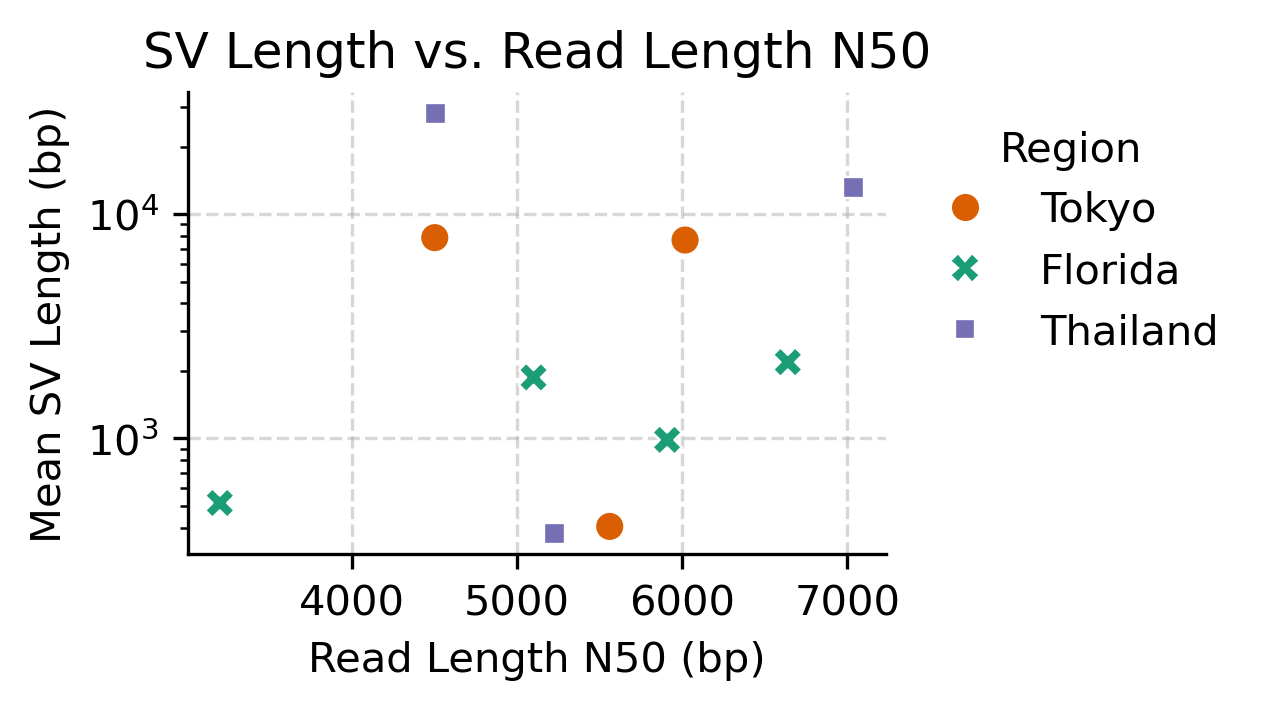

In [28]:
# Merge the dataframes
merged_df = snif_stats.merge(stats, left_on="sample", right_on="Sample ID")

# Define figure size and styles
figsize = (3, 2)
dpi = 300

# Plot Mean SV Length vs Mean Read Length
fig, ax = plt.subplots(figsize=figsize, dpi=dpi)
sns.scatterplot(data=merged_df, x="Mean read length", y="SVLEN_MEAN", style='Region', hue='Region', s=50, zorder=999, palette=region_colors)
# plt.xscale("log")
plt.yscale("log")
plt.xlabel("Mean Read Length (bp)")
plt.ylabel("Mean SV Length (bp)")
plt.title("SV Length vs. Read Length")
plt.grid(axis="both", linestyle="--", alpha=0.5, zorder=0)
sns.despine()
plt.legend(title="Region", bbox_to_anchor=(1, 1), loc="upper left", frameon=False)
plt.savefig('svlen_vs_readlen.pdf', bbox_inches='tight')
plt.savefig('svlen_vs_readlen.png', bbox_inches='tight', dpi=300)
plt.show()

# Plot Mean SV Length vs Read Length N50
fig, ax = plt.subplots(figsize=figsize, dpi=dpi)
sns.scatterplot(data=merged_df, x="Read length N50", y="SVLEN_MEAN", style='Region', hue='Region', s=50, zorder=999, palette=region_colors)
# plt.xscale("log")
plt.yscale("log")
plt.xlabel("Read Length N50 (bp)")
plt.ylabel("Mean SV Length (bp)")
plt.title("SV Length vs. Read Length N50")
plt.grid(axis="both", linestyle="--", alpha=0.5, zorder=0)
sns.despine()
plt.legend(title="Region", bbox_to_anchor=(1, 1), loc="upper left", frameon=False)
plt.savefig('svlen_vs_readlen_n50.pdf', bbox_inches='tight')
plt.savefig('svlen_vs_readlen_n50.png', bbox_inches='tight', dpi=300)
plt.show()


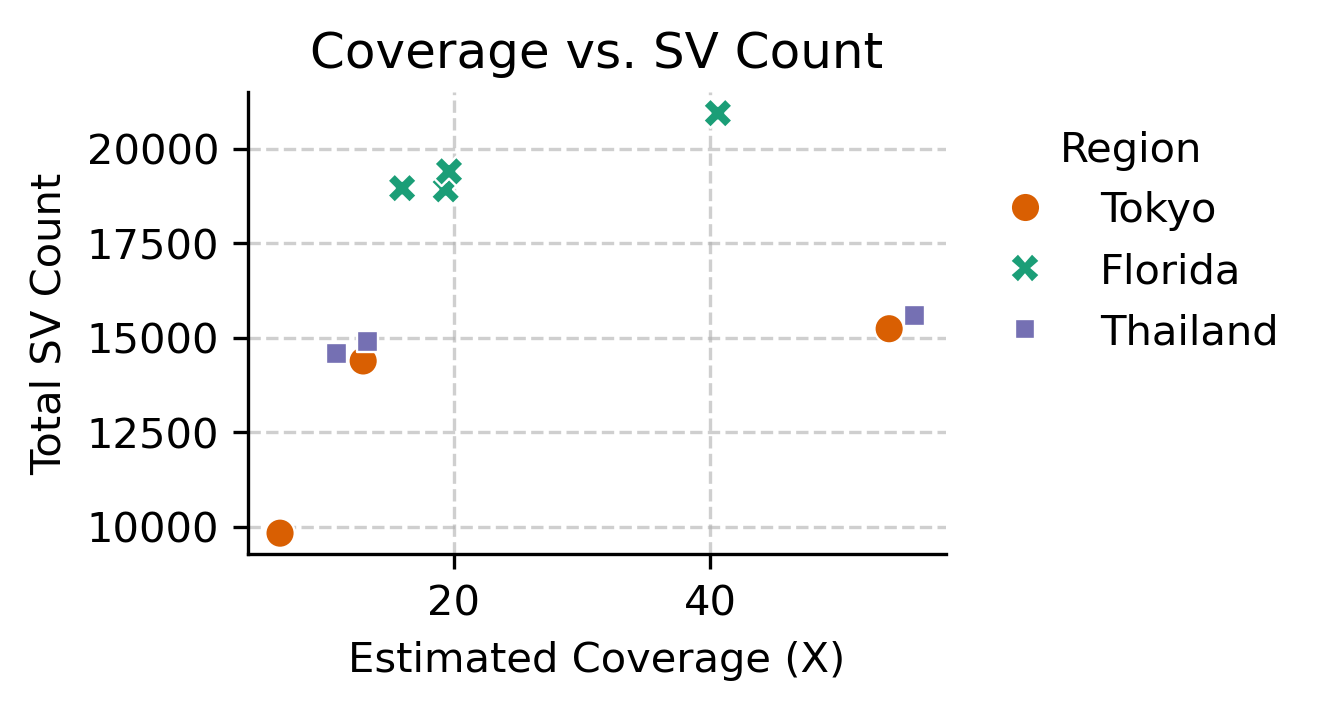

In [30]:
fig, ax = plt.subplots(figsize=(3,2), dpi=300)

sns.scatterplot(data=merged_df, x="Est. Coverage (X)", y="total_variants", style='Region', hue='Region', s=50, zorder=999, palette=region_colors)

plt.xlabel("Estimated Coverage (X)")
plt.ylabel("Total SV Count")
plt.title("Coverage vs. SV Count")

sns.despine()
plt.grid(axis="both", linestyle="--", alpha=0.6)

plt.legend(title="Region", bbox_to_anchor=(1, 1), loc="upper left", frameon=False)

plt.savefig('coverage_vs_sv_count.pdf', bbox_inches='tight')
plt.savefig('coverage_vs_sv_count.png', bbox_inches='tight', dpi=300)
plt.show()


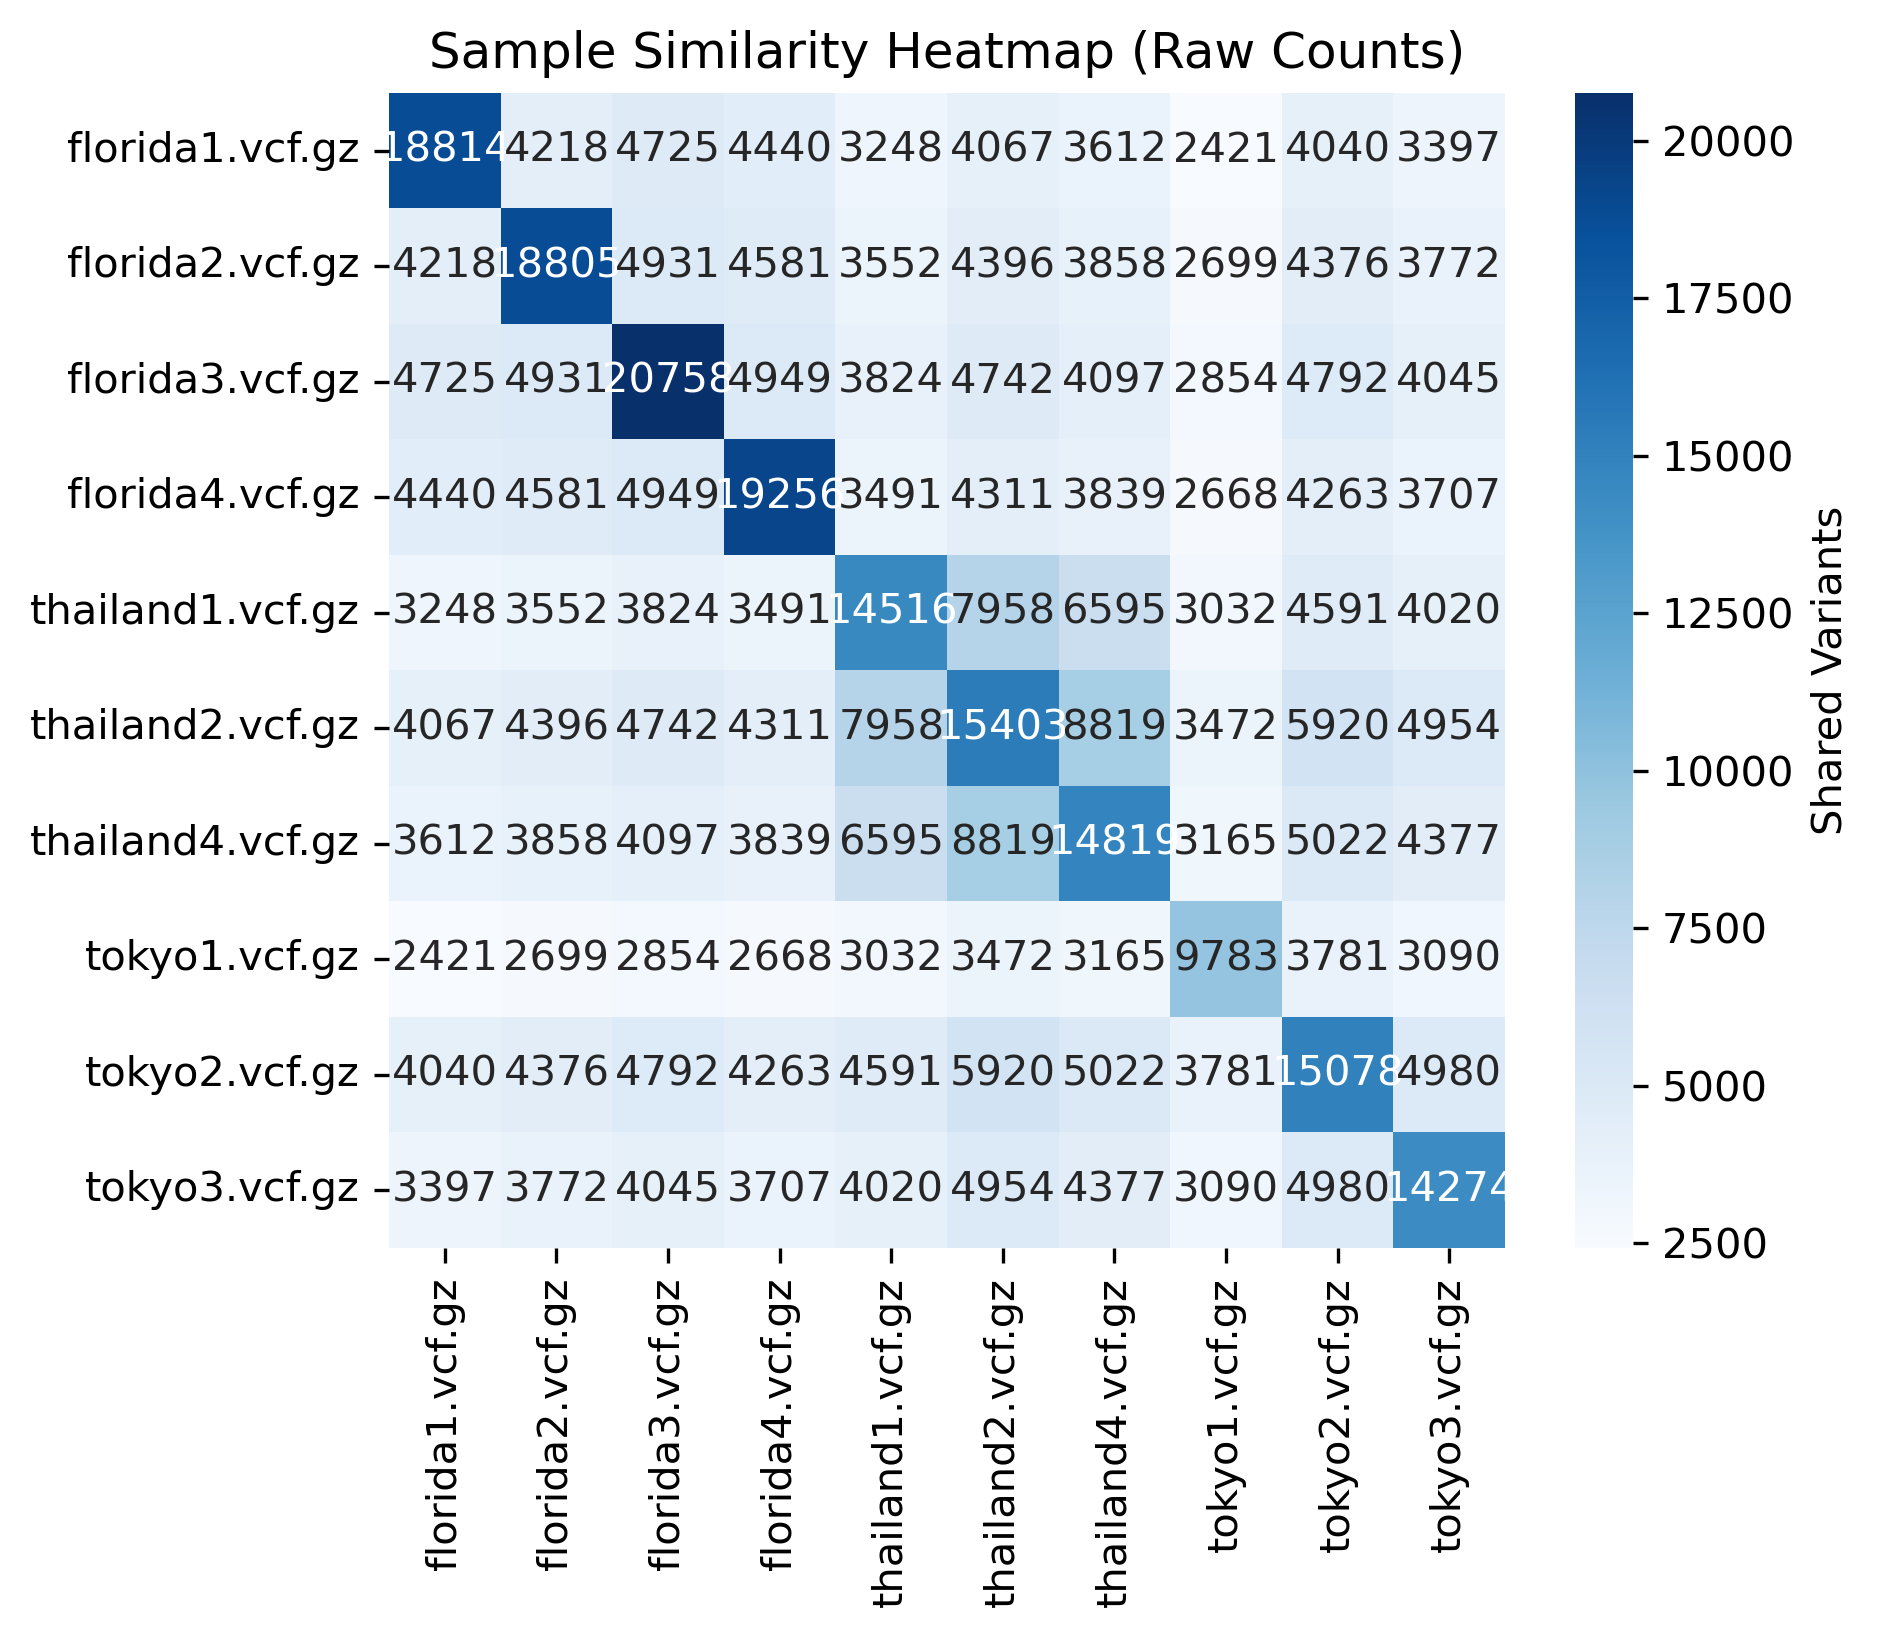

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Venn numbers
vn_data = []
with open("/Users/bebr1814/projects/chuong_bees/data/20250211_1135_P2S-00613-A_PBA08559_66fdcccd/uncorrected_fastq/alignments_amelhav3.1/sniffles_variants/venn_data.txt") as f:
    for line in f:
        parts = line.strip().split("\t")
        count = int(parts[0])
        samples = [p.split(" ")[0] for p in parts[1:]]
        vn_data.append((count, samples))

# Construct sample similarity matrix
samples = sorted(set(s for _, sample_list in vn_data for s in sample_list))  # Keep them sorted
matrix = pd.DataFrame(0, index=samples, columns=samples)

# Populate co-occurrence counts (raw counts)
for count, sample_list in vn_data:
    for s1 in sample_list:
        for s2 in sample_list:
            matrix.loc[s1, s2] += count

# Plot heatmap without clustering
plt.figure(figsize=(6, 5), dpi=300)
sns.heatmap(matrix, cmap="Blues", annot=True, fmt="d", xticklabels=True, yticklabels=True, cbar_kws={'label': 'Shared Variants'})
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title("Sample Similarity Heatmap (Raw Counts)")  
plt.show()


### Merged consensus variant calls

In [32]:
region_colors

{'Florida': '#1b9e77', 'Tokyo': '#d95f02', 'Thailand': '#7570b3'}

In [48]:
counts_all

{'FL': 171, 'TH': 0, 'TK': 0, 'FL_TH': 37, 'FL_TK': 9, 'TH_TK': 0, 'ALL': 456}

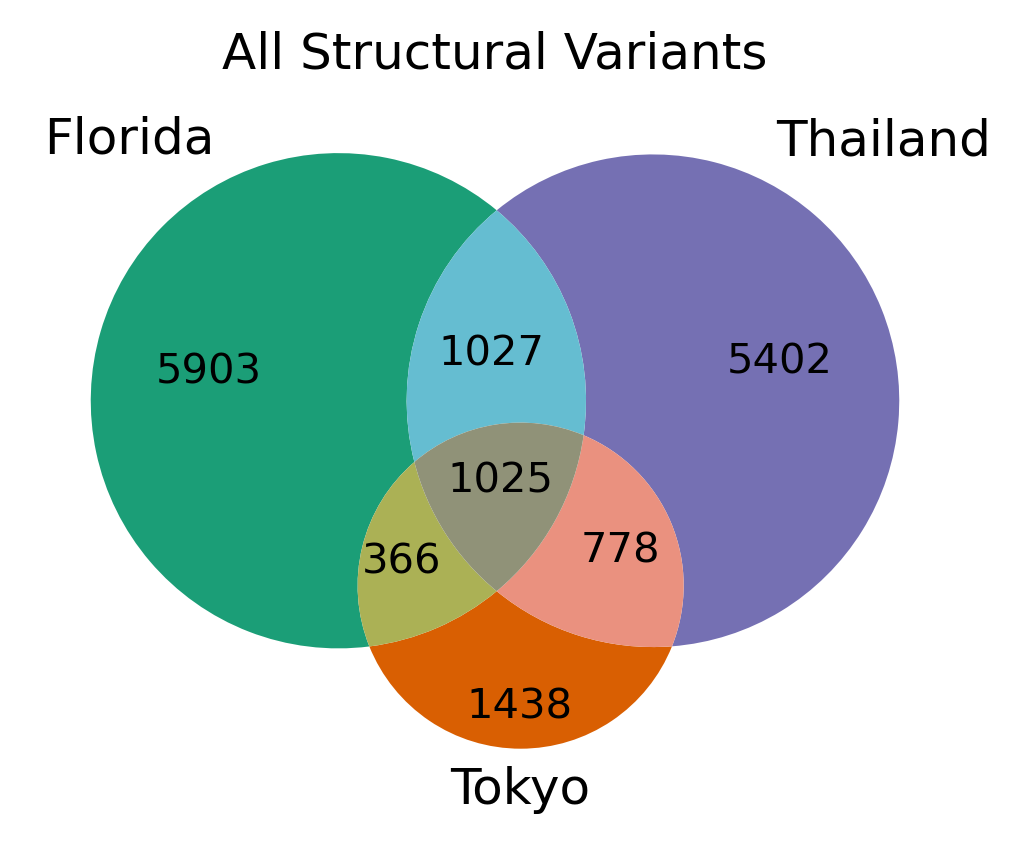

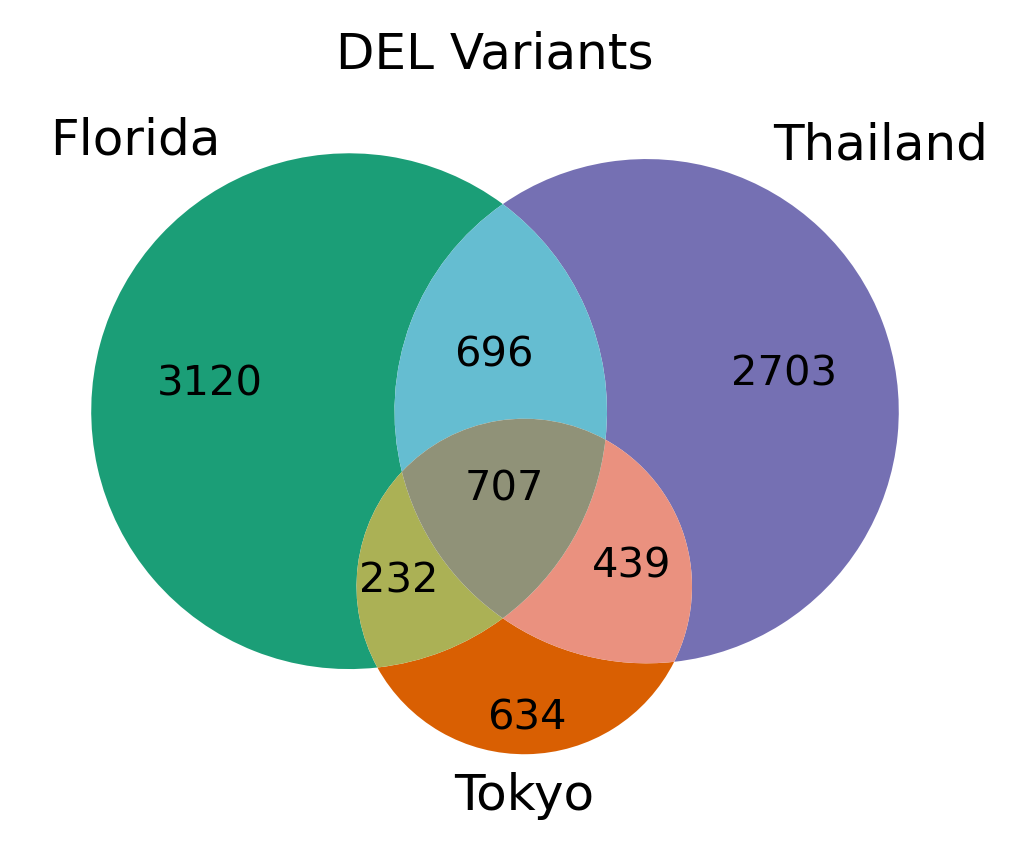

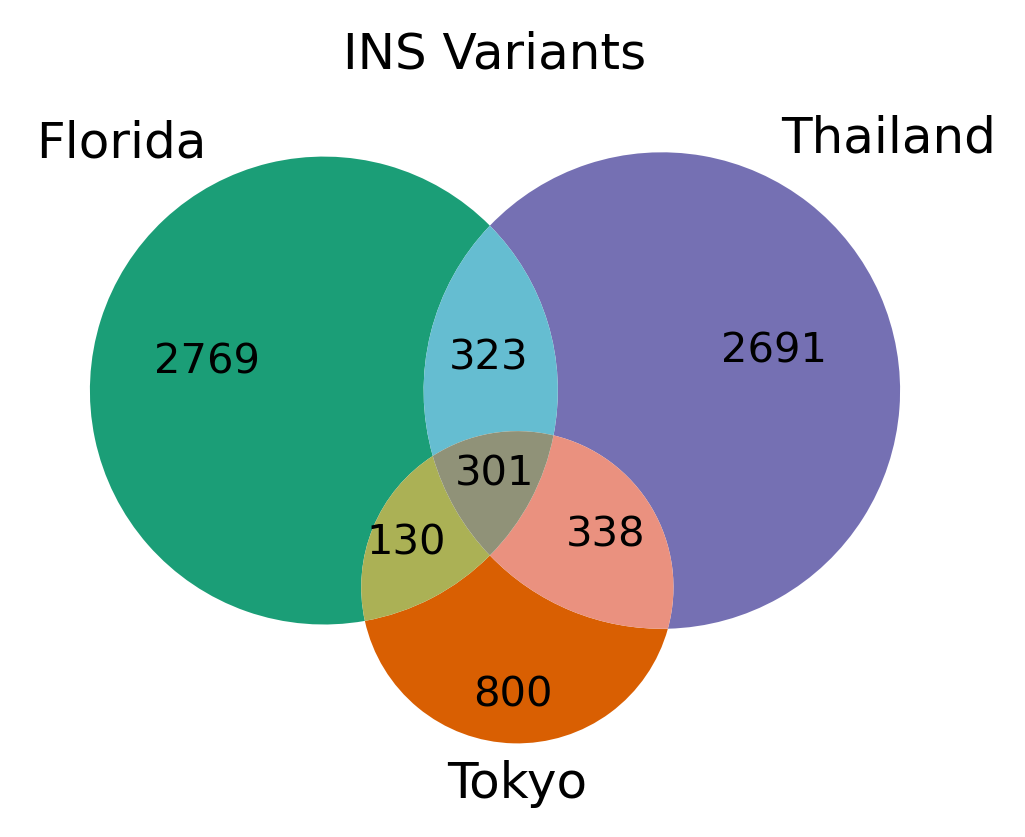

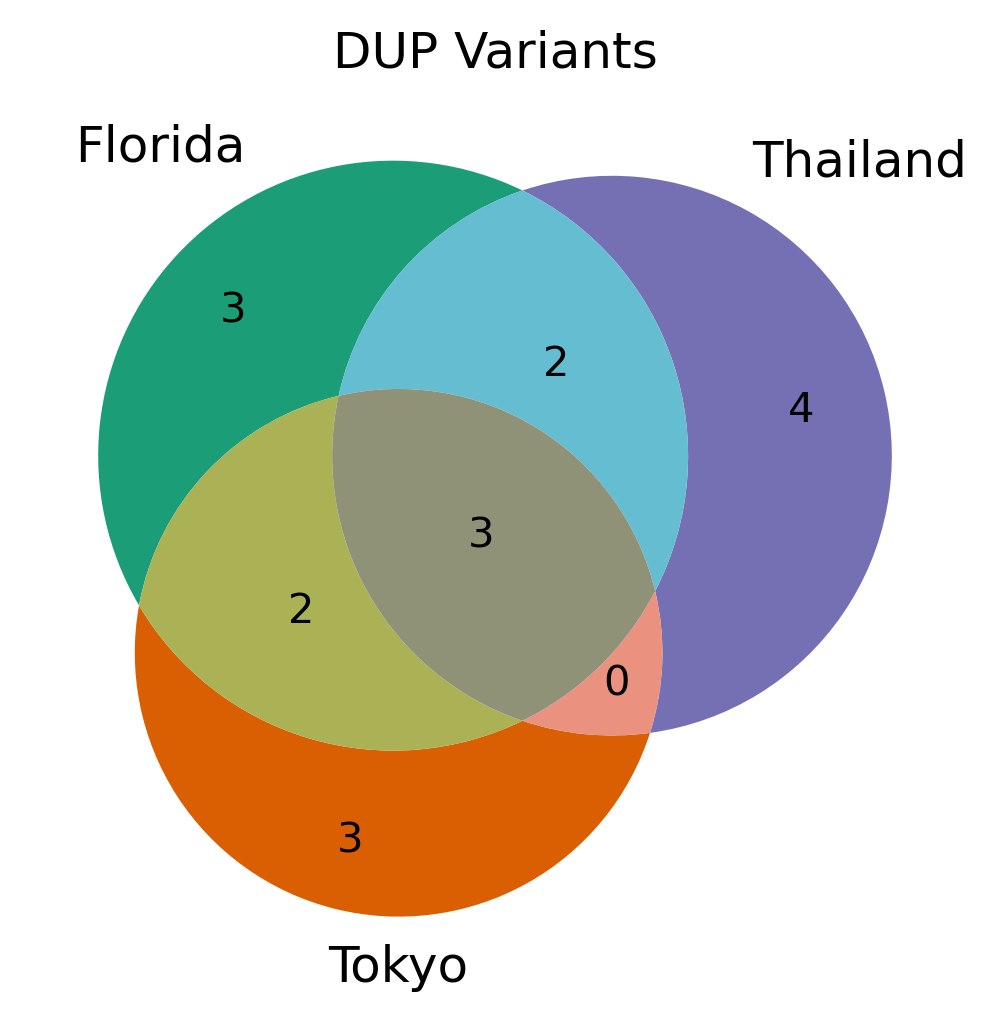

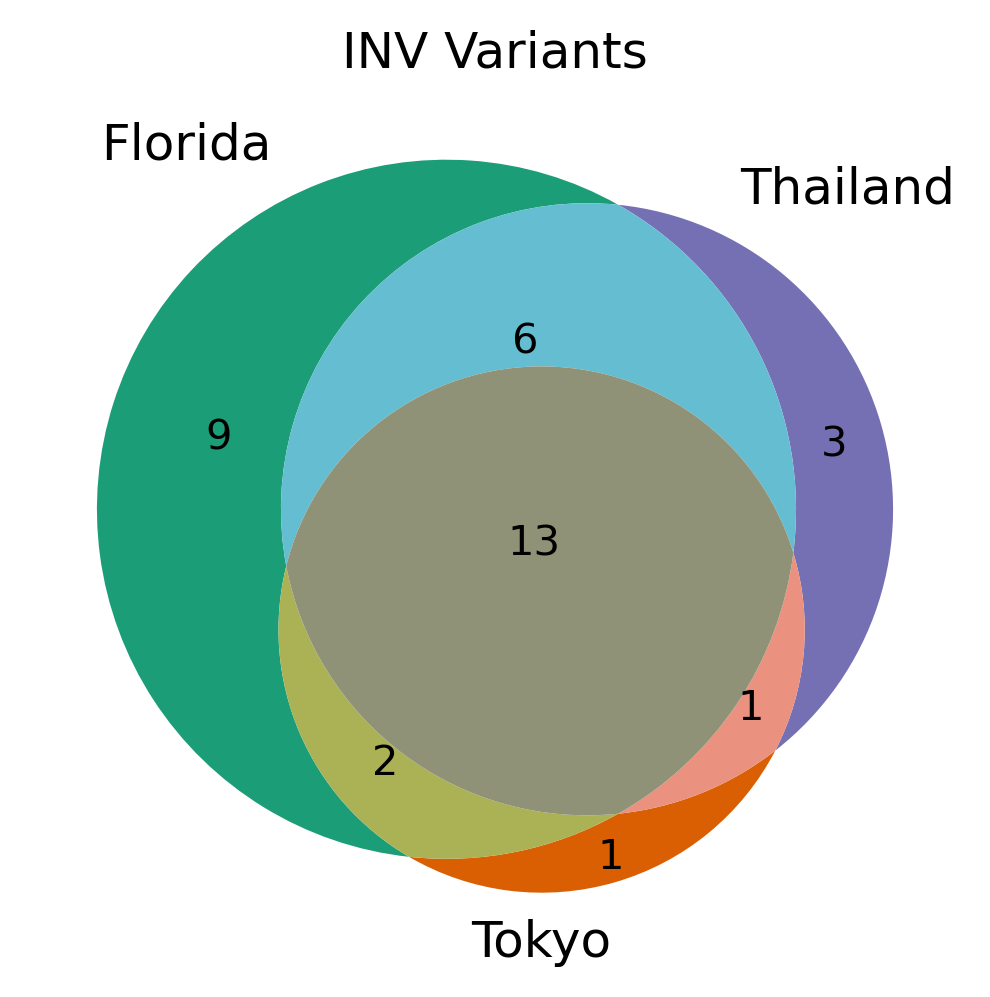

/Users/bebr1814/miniconda3/envs/pyda/lib/python3.12/site-packages/matplotlib_venn/layout/venn3/pairwise.py:169: UserWarning: Bad circle positioning.
  warnings.warn("Bad circle positioning.")


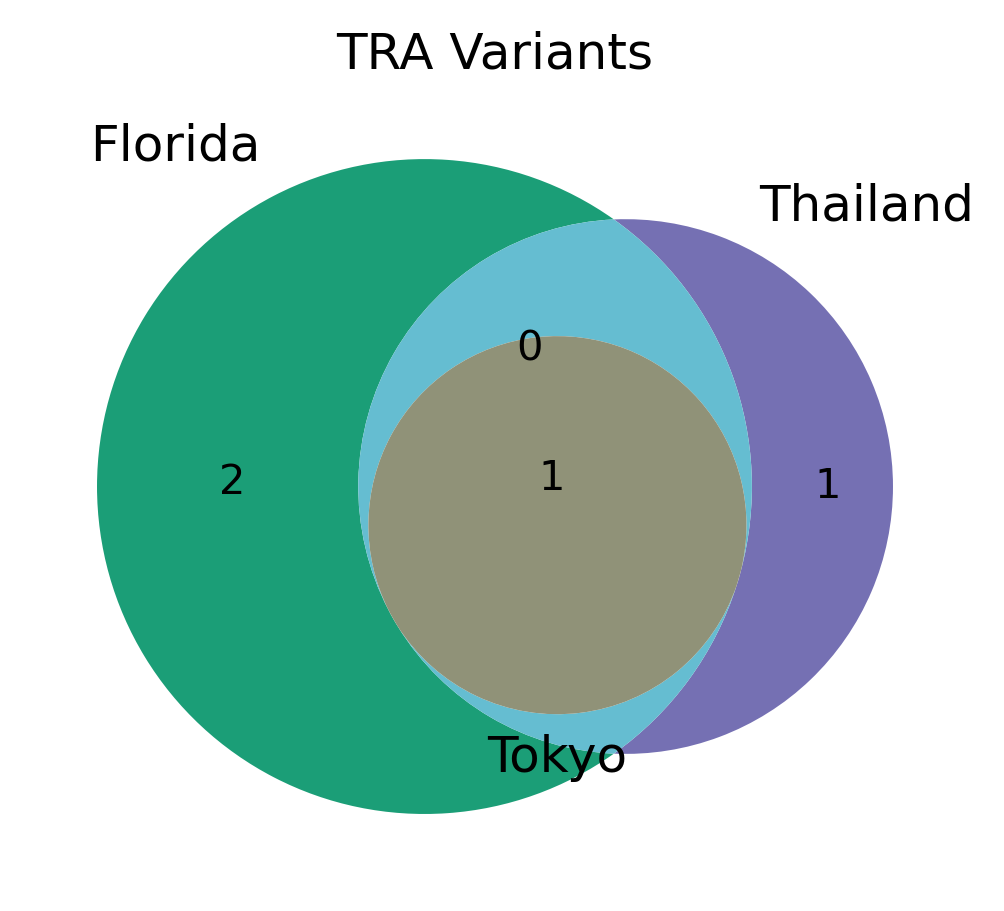

In [53]:
from matplotlib_venn import venn3

# Path to consensus VCF sets
consensus_sets_path = "/Users/bebr1814/projects/chuong_bees/data/20250211_1135_P2S-00613-A_PBA08559_66fdcccd/uncorrected_fastq/alignments_amelhav3.1/sniffles_variants"

# Define VCF file names
vcf_files = {
    "FL": os.path.join(consensus_sets_path, "florida_unique.vcf"),
    "TH": os.path.join(consensus_sets_path, "thailand_unique.vcf"),
    "TK": os.path.join(consensus_sets_path, "tokyo_unique.vcf"),
    "FL_TH": os.path.join(consensus_sets_path, "FL_TH_shared.vcf"),
    "FL_TK": os.path.join(consensus_sets_path, "FL_TK_shared.vcf"),
    "TH_TK": os.path.join(consensus_sets_path, "TH_TK_shared.vcf"),
    "ALL": os.path.join(consensus_sets_path, "all_shared.vcf"),
}

# Function to count total SVs or filter by type
def count_variants(vcf_file, sv_type=None):
    count = 0
    if not os.path.exists(vcf_file):
        return 0
    with open(vcf_file, 'r') as f:
        for line in f:
            if line.startswith("#"):
                continue
            if sv_type:
                # Check if the SV type matches
                if f"SVTYPE={sv_type}" in line:
                    count += 1
            else:
                count += 1
    return count

# Get counts for all SVs
counts_all = {k: count_variants(v) for k, v in vcf_files.items()}

# SV types to analyze separately
sv_types = ["DEL", "INS", "DUP", "INV", "TRA"]  # Adjust if needed

# Function to plot a Venn diagram
def plot_venn(counts, title):
    fig, ax = plt.subplots(figsize=(4,4), dpi=300)

    venn = venn3(
        subsets=(
            counts["FL"],       # Florida only
            counts["TH"],       # Thailand only
            counts["FL_TH"],    # Florida & Thailand
            counts["TK"],       # Tokyo only
            counts["FL_TK"],    # Florida & Tokyo
            counts["TH_TK"],    # Thailand & Tokyo
            counts["ALL"],      # Shared by all three
        ),
        set_labels=("Florida", "Thailand", "Tokyo"),
        set_colors=(region_colors["Florida"], region_colors["Thailand"], region_colors["Tokyo"]),
    )

    for combo in ['100', '010', '001', '110', '101', '111', '011']:
        try:
            venn.get_patch_by_id(combo).set_alpha(1.0)
        except:
            pass
    
    plt.title(title)
    plt.savefig(f'SV_consensus_venn_{title.replace(" ","_")}.pdf', bbox_inches='tight')
    plt.savefig(f'SV_consensus_venn_{title.replace(" ","_")}.png', bbox_inches='tight', dpi=300)
    plt.show()


# Plot Venn for all SVs
plot_venn(counts_all, "All Structural Variants")

# Plot separate Venn diagrams for each SV type
for sv in sv_types:
    counts_sv = {k: count_variants(v, sv) for k, v in vcf_files.items()}
    plot_venn(counts_sv, f"{sv} Variants")


In [55]:
# Load pairwise overlap counts
pairwise_counts_path = '/Users/bebr1814/projects/chuong_bees/data/20250211_1135_P2S-00613-A_PBA08559_66fdcccd/uncorrected_fastq/alignments_amelhav3.1/sniffles_variants/pairwise_overlaps'


# make a dataframe in which rows and columns are samples
pairwise_vars = pd.DataFrame()

for f in glob.glob(pairwise_counts_path + '/*.vcf'):
	# read the vcf and get counts for variants
	sample_A = os.path.basename(f).split('_vs_')[0].replace('.vcf.gz','')
	sample_B = os.path.basename(f).split('_vs_')[1].replace('.vcf.gz.vcf','')
	pairwise_vars.loc[sample_A, sample_B] = count_variants(f)

pairwise_vars

,florida2,tokyo1,florida3,tokyo3,florida4,thailand4,thailand2,thailand1,florida1,tokyo2
thailand4,2820.0,2331.0,3004.0,3293.0,2808.0,14905.0,7220.0,5160.0,2597.0,3883.0
tokyo2,3257.0,2877.0,3686.0,3850.0,3152.0,3883.0,4732.0,3535.0,2991.0,15235.0
tokyo3,2740.0,2278.0,2984.0,14382.0,2694.0,3293.0,3849.0,3005.0,2460.0,3850.0
thailand1,2601.0,2211.0,2824.0,3005.0,2547.0,5160.0,6446.0,14590.0,2360.0,3535.0
thailand2,3291.0,2620.0,3625.0,3849.0,3213.0,7220.0,15588.0,6446.0,3027.0,4732.0
florida1,3050.0,1735.0,3493.0,2460.0,3197.0,2597.0,3027.0,2360.0,18953.0,2991.0
florida2,18921.0,1938.0,3621.0,2740.0,3336.0,2820.0,3291.0,2601.0,3050.0,3257.0
florida4,3336.0,1872.0,3637.0,2694.0,19399.0,2808.0,3213.0,2547.0,3197.0,3152.0
tokyo1,1938.0,9827.0,2050.0,2278.0,1872.0,2331.0,2620.0,2211.0,1735.0,2877.0
florida3,3621.0,2050.0,20937.0,2984.0,3637.0,3004.0,3625.0,2824.0,3493.0,3686.0


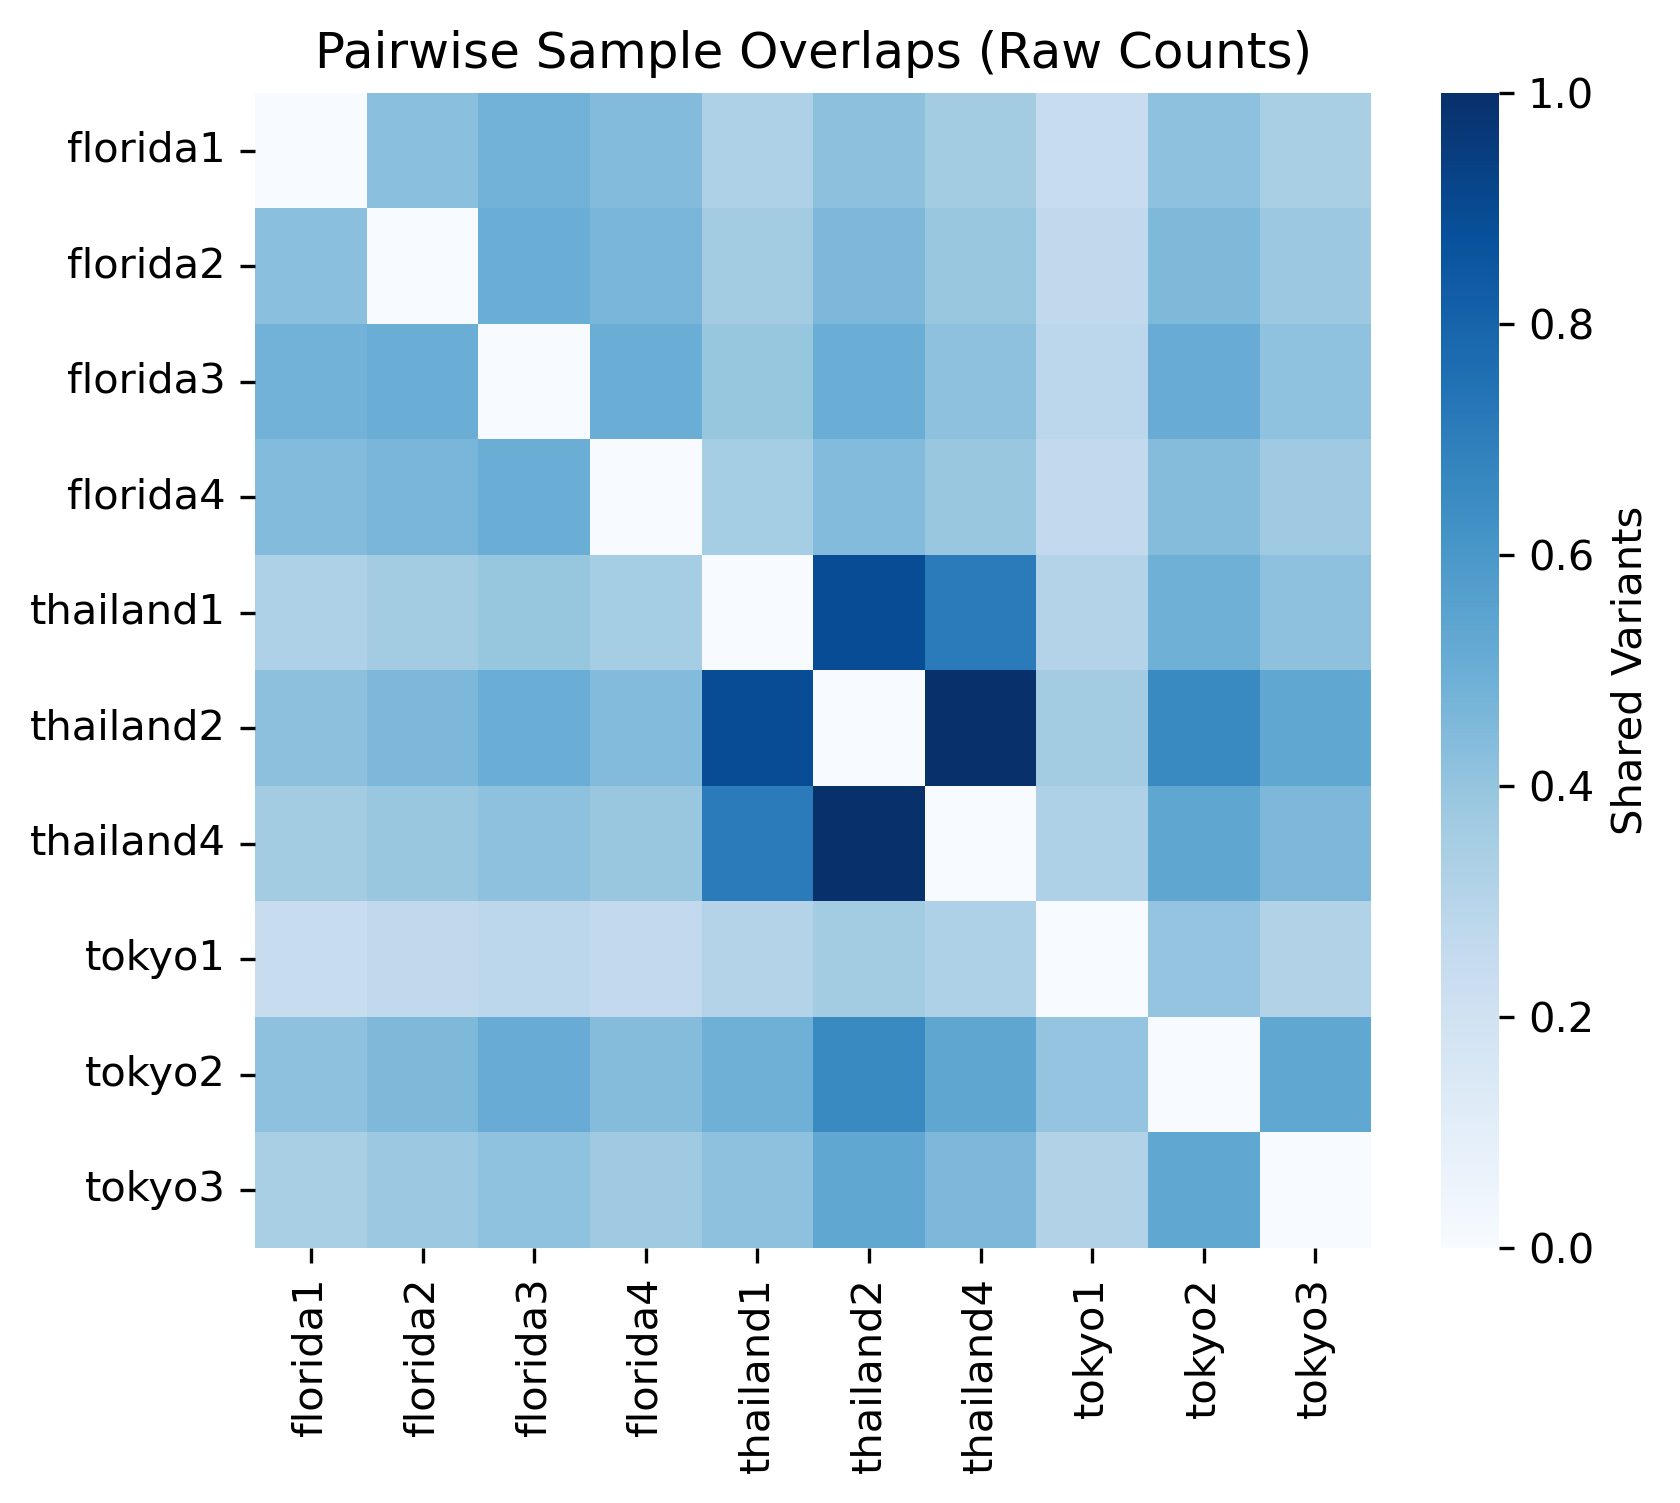

: 

In [ ]:
# sort rows and cols by sample name
pairwise_vars = pairwise_vars.sort_index(axis=0).sort_index(axis=1)

# fill diagonal with 0s
np.fill_diagonal(pairwise_vars.values, 0)

# normalize
pairwise_vars = pairwise_vars / pairwise_vars.max().max()

# Heatmap
fig, ax = plt.subplots(figsize=(6, 5), dpi=300)
sns.heatmap(pairwise_vars, cmap="Blues", annot=False, xticklabels=True, yticklabels=True, cbar_kws={'label': 'Shared Variants'})
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title("Pairwise Sample Overlaps (Raw Counts)")
# plt.savefig('pairwise_sample_overlaps.pdf', bbox_inches='tight')
plt.show()

## Variant calls overlapping genes and repeats

In [31]:
bed_dir = "/Users/bebr1814/projects/chuong_bees/data/20250211_1135_P2S-00613-A_PBA08559_66fdcccd/uncorrected_fastq/alignments_amelhav3.1/annotation_overlaps"
sample_name = "florida3"

# Load gene and repeat overlap files
gene_bed_file = f"{bed_dir}/{sample_name}_gene_overlap.bed"
repeat_bed_file = f"{bed_dir}/{sample_name}_repeat_overlap.bed"

def load_bed_file(file_path, feature_type):
    """Load and extract relevant columns for analysis."""
    df = pd.read_csv(file_path, sep="\t", header=None)

    # Trim to relevant columns
    df = df.iloc[:, :8]
    df.columns = ["chrom", "start", "end", "svtype", "feature_chrom", "feature_start", "feature_end", "feature"]

    # Add feature type (gene/repeat) and SV length
    df["feature_type"] = feature_type
    df["sv_length"] = df["end"] - df["start"]

    return df

# Load gene and repeat overlaps
gene_df = load_bed_file(gene_bed_file, "gene")
repeat_df = load_bed_file(repeat_bed_file, "repeat")
repeat_df['feature'] = repeat_df['feature'].str.replace('.','No Repeat')

# Summarize repeats: Count SV types per repeat category
repeat_summary = repeat_df.groupby(["feature", "svtype"]).size().unstack(fill_value=0)
repeat_summary["total"] = repeat_summary.sum(axis=1)
repeat_summary['repeat_type'] = repeat_summary.index.str.split('#').str[-1]

# Summarize genes: Count SVs affecting each gene
gene_summary = gene_df.groupby(["feature", "svtype"]).size().unstack(fill_value=0)
gene_summary["total"] = gene_summary.sum(axis=1)

# Save per-sample summaries
repeat_summary.to_csv(f"{bed_dir}/{sample_name}_repeat_summary.csv")
gene_summary.to_csv(f"{bed_dir}/{sample_name}_gene_summary.csv")

print(repeat_summary.head(), "\n")
print(gene_summary.head())


svtype                     BND  DEL  DUP  INS  INV  total    repeat_type
feature                                                                 
(A)n#Simple_repeat           0  162   42   27  202    433  Simple_repeat
(AAAAAG)n#Simple_repeat      0    0    0    0    1      1  Simple_repeat
(AAAAG)n#Simple_repeat       0    0    1    0    1      2  Simple_repeat
(AAAAGA)n#Simple_repeat      0    0    0    0    1      1  Simple_repeat
(AAAAGAAT)n#Simple_repeat    0    0    0    0    1      1  Simple_repeat 

svtype       BND   DEL  DUP   INS   INV  total
feature                                       
.             15  2998   25  2470    17   5525
CDS            0   829  473   184  1503   2989
exon           0  1266  589   575  1992   4422
gene           1  9049  162  7670   138  17020
start_codon    0    43   67     1   197    308


In [32]:
# Load baseline repeat occurrence counts in the genome
repeat_baseline = pd.read_csv(
    "/Users/bebr1814/projects/chuong_bees/data/20250211_1135_P2S-00613-A_PBA08559_66fdcccd/uncorrected_fastq/alignments_amelhav3.1/annotation_overlaps/repeats.bed",
    sep='\t', header=None
).iloc[:, :4]
repeat_baseline.columns = ["chrom", "start", "end", "feature"]
repeat_baseline['repeat_type'] = repeat_baseline['feature'].str.split('#').str[-1]
repeat_baseline

,chrom,start,end,feature,repeat_type
0,NC_037638.1,12,261,(ACCTTA)n#Simple_repeat,Simple_repeat
1,NC_037638.1,271,4169,(TAACC)n#Simple_repeat,Simple_repeat
2,NC_037638.1,4232,4452,(TAA)n#Simple_repeat,Simple_repeat
3,NC_037638.1,4458,4627,(AATGAT)n#Simple_repeat,Simple_repeat
4,NC_037638.1,4645,4673,(TA)n#Simple_repeat,Simple_repeat
...,...,...,...,...,...
290473,NW_020555944.1,847,890,(TATATT)n#Simple_repeat,Simple_repeat
290474,NW_020555944.1,973,1016,A-rich#Low_complexity,Low_complexity
290475,NW_020555944.1,1171,1231,(TA)n#Simple_repeat,Simple_repeat
290476,NW_020555944.1,1362,1437,(AT)n#Simple_repeat,Simple_repeat


In [33]:
repeat_baseline['repeat_type'].value_counts()

repeat_type
Simple_repeat        237660
Low_complexity        50896
DNA/TcMar-Mariner      1088
DNA/TcMar-Tc1           773
rRNA                     47
LINE/R2                  14
Name: count, dtype: int64

/tmp/ipykernel_53313/1513175110.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toplot['log_sv_length'] = np.log10(toplot['sv_length'])
/tmp/ipykernel_53313/1513175110.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toplot['repeat_type'] = toplot['feature'].str.split('#').str[-1]
/tmp/ipykernel_53313/1513175110.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

repeat_type
No Repeat            7424
Simple_repeat        4871
Low_complexity        821
DNA/TcMar-Tc1         240
DNA/TcMar-Mariner      78
rRNA                   10
LINE/R2                 5
Name: count, dtype: int64


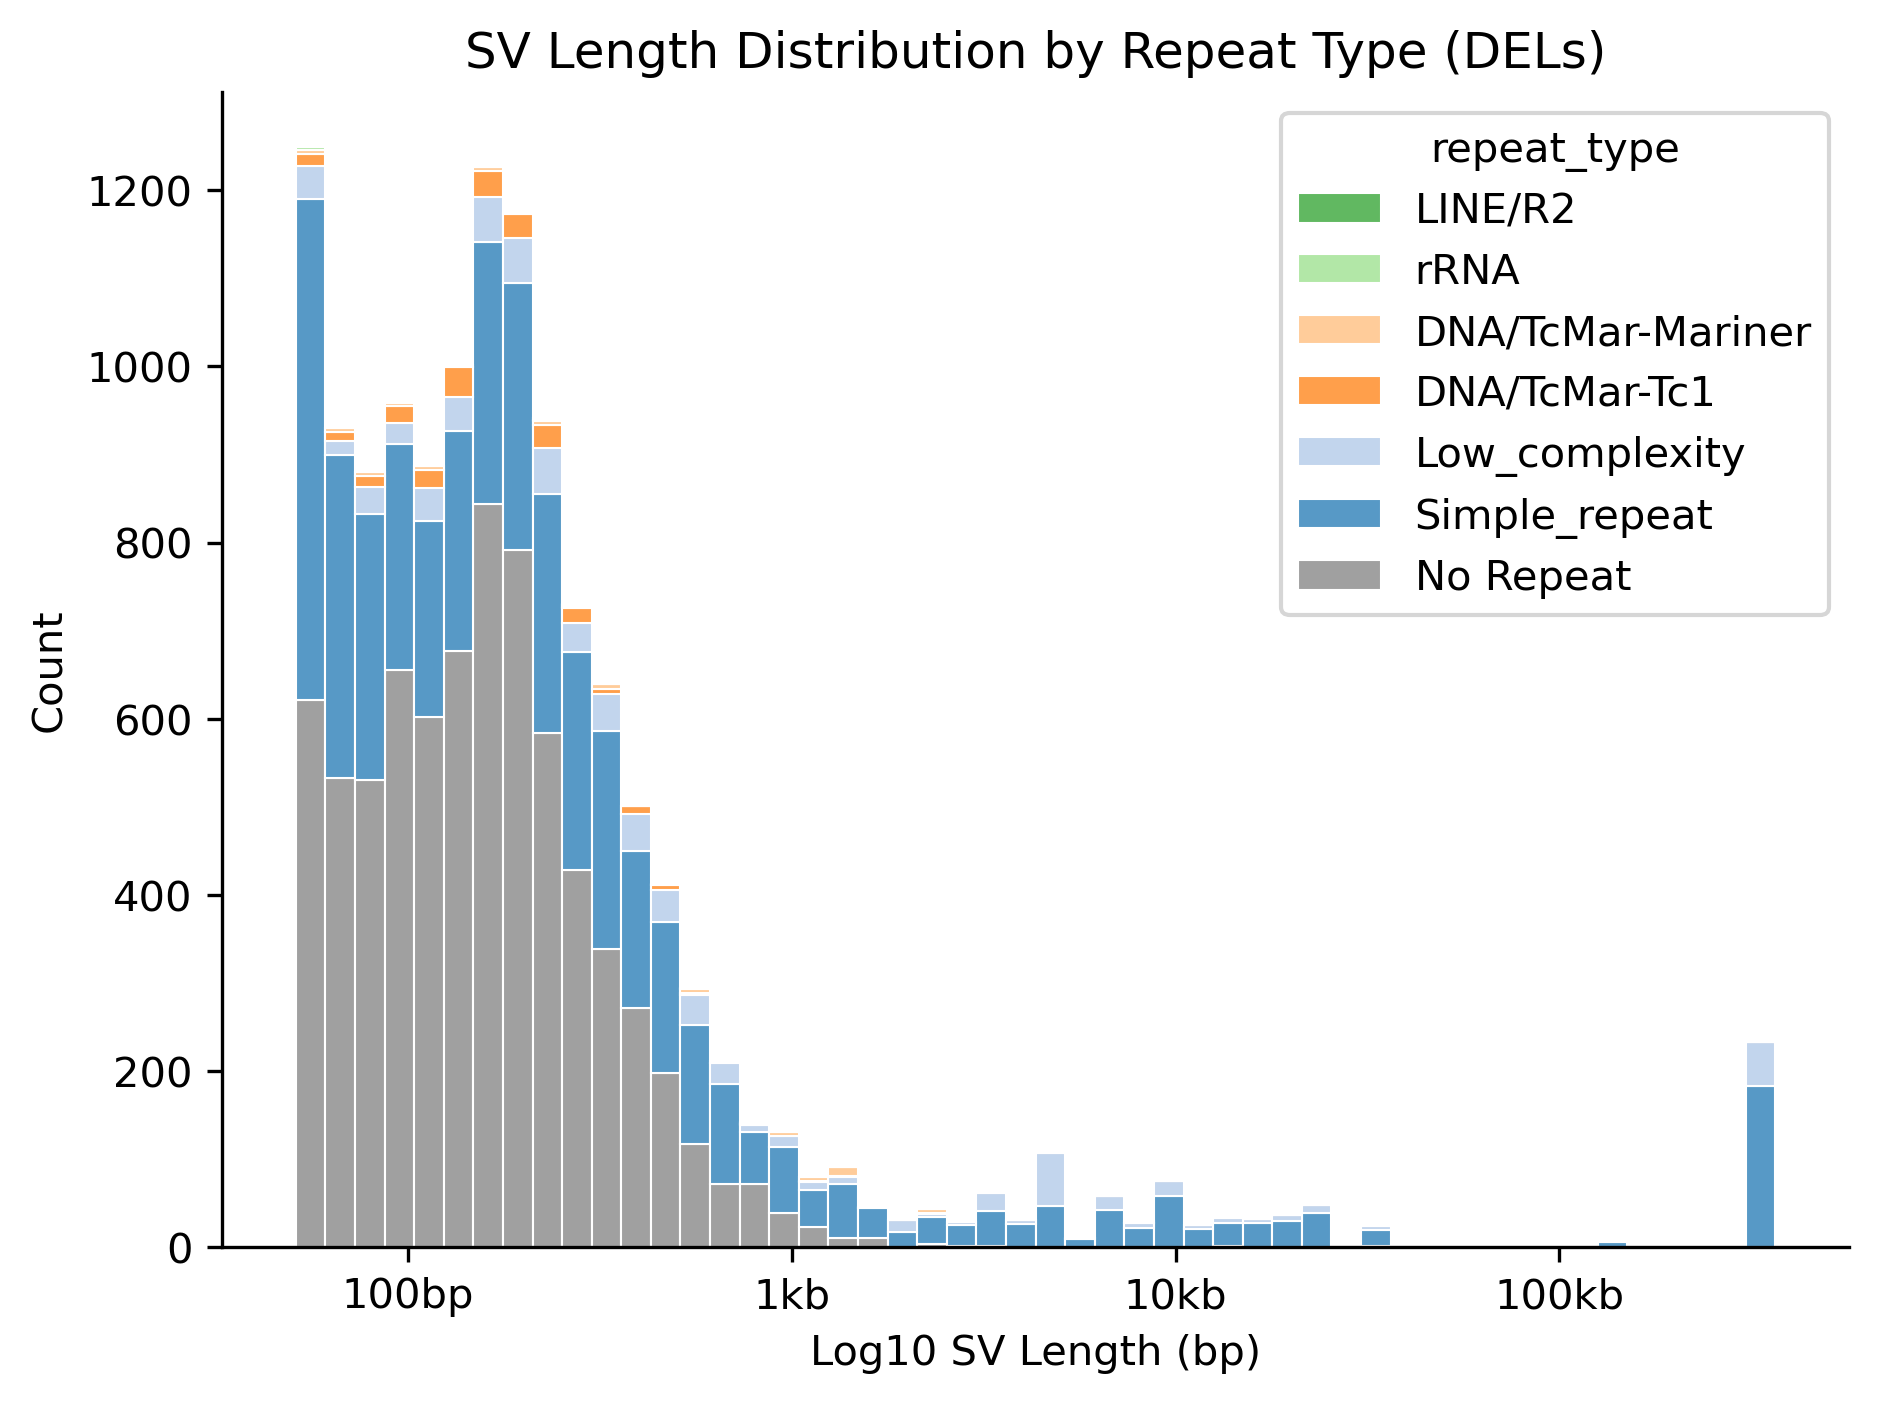

In [136]:
# Stacked histplot of log-transformed sv len (x) vs repeat type (y) (DEL only for now since we can't find repeats in insertions based on overlap with ref)
fig, ax = plt.subplots(figsize=(7,5), dpi=300)

toplot = repeat_df[repeat_df['svtype'] == 'DEL']
toplot['log_sv_length'] = np.log10(toplot['sv_length'])
toplot['repeat_type'] = toplot['feature'].str.split('#').str[-1]
print(toplot['repeat_type'].value_counts())
# sort by most to least common repeat type (ascending)
toplot['repeat_type'] = pd.Categorical(toplot['repeat_type'], categories=toplot['repeat_type'].value_counts().index[::-1], ordered=True)

# Set color palette for repeat types
repeat_palette = {
	'No Repeat': 'grey',
	'Simple_repeat': sns.color_palette('tab20')[0],
	'Low_complexity': sns.color_palette('tab20')[1],
	'DNA/TcMar-Tc1': sns.color_palette('tab20')[2],
	'DNA/TcMar-Mariner': sns.color_palette('tab20')[3],
	'LINE/R2': sns.color_palette('tab20')[4],
	'rRNA': sns.color_palette('tab20')[5],
}

sns.histplot(data=toplot, x='log_sv_length', hue='repeat_type', multiple='stack', bins=50, palette=repeat_palette, ax=ax, linewidth=0.5, edgecolor='white', line_kws={'alpha':0.5})

plt.xlabel('Log10 SV Length (bp)')
plt.ylabel('Count')
plt.title('SV Length Distribution by Repeat Type (DELs)')

# calculate a nice x-tick labeling (100bp, 1kb, 10kb, 100kb, 1Mb)
ax.set_xticks(np.log10([100, 1000, 10000, 100000]))
ax.set_xticklabels(['100bp', '1kb', '10kb', '100kb'])

sns.despine()

plt.savefig('sv_len_by_repeat_type.pdf', bbox_inches='tight')
plt.savefig('sv_len_by_repeat_type.png', bbox_inches='tight', dpi=300)
plt.show()

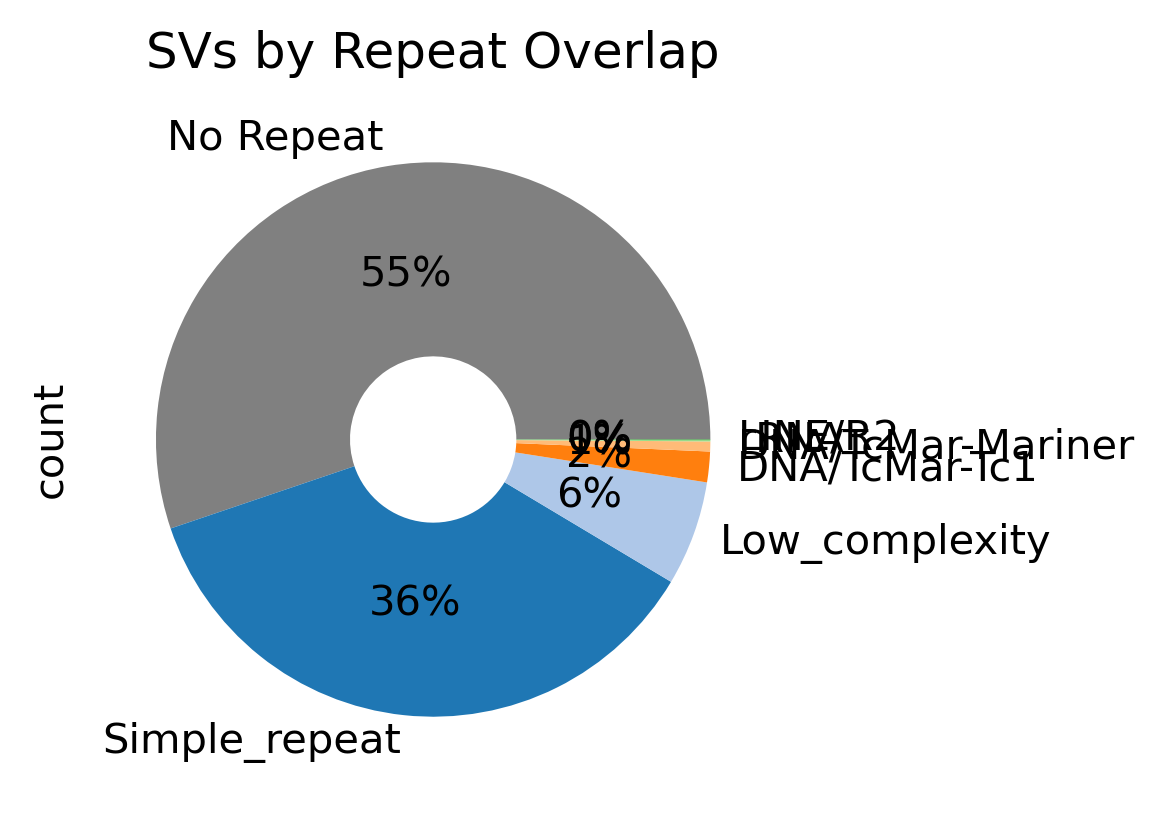

In [144]:
# pie chart of SVs by repeat overlap
fig, ax = plt.subplots(figsize=(3,3), dpi=300)

toplot['repeat_type'].value_counts().plot.pie(ax=ax, autopct='%1.0f%%', colors=[repeat_palette[x] for x in toplot['repeat_type'].value_counts().index], wedgeprops=dict(width=0.7))
plt.title('SVs by Repeat Overlap')

plt.savefig('svs_by_repeat_overlap.pdf', bbox_inches='tight')
plt.savefig('svs_by_repeat_overlap.png', bbox_inches='tight', dpi=300)
plt.show()

In [94]:
# Compute total occurrences of each repeat type in the genome
repeat_baseline["length"] = repeat_baseline["end"] - repeat_baseline["start"]
total_repeat_counts = repeat_baseline.groupby("feature").size().reset_index()
total_repeat_counts.columns = ["feature", "total_in_genome"]
total_repeat_counts

,feature,total_in_genome
0,(A)n#Simple_repeat,14362
1,(AA)n#Simple_repeat,4
2,(AAAA)n#Simple_repeat,2
3,(AAAAAAC)n#Simple_repeat,1
4,(AAAAAAG)n#Simple_repeat,12
...,...,...
6904,SSU-rRNA_Dme#rRNA,2
6905,SSU-rRNA_Hsa#rRNA,8
6906,T-rich#Low_complexity,66
6907,polypurine#Low_complexity,3


In [64]:
# Merge datasets to normalize
df = repeat_summary.merge(total_repeat_counts, on="feature", how="left")
df["normalized_overlap"] = df["total"] / df["total_in_genome"]
df

,feature,BND,DEL,DUP,INS,INV,total,repeat_type,total_in_genome,normalized_overlap
0,(A)n#Simple_repeat,1,120,1275,28,1117,2541,Simple_repeat,404278,0.006285
1,(AAAAAAG)n#Simple_repeat,0,0,1,0,1,2,Simple_repeat,498,0.004016
2,(AAAAAAT)n#Simple_repeat,0,0,1,0,0,1,Simple_repeat,76,0.013158
3,(AAAAAG)n#Simple_repeat,0,0,6,0,9,15,Simple_repeat,3081,0.004869
4,(AAAAAGA)n#Simple_repeat,0,0,2,0,2,4,Simple_repeat,985,0.004061
...,...,...,...,...,...,...,...,...,...,...
2764,Mariner-2_AMel#DNA/TcMar-Tc1,0,10,1,16,0,27,DNA/TcMar-Tc1,118551,0.000228
2765,Mariner_AM#DNA/TcMar-Mariner,0,57,60,17,26,160,DNA/TcMar-Mariner,965340,0.000166
2766,R2Amel#LINE/R2,3,0,0,1,0,4,LINE/R2,87833,0.000046
2767,T-rich#Low_complexity,0,4,7,3,0,14,Low_complexity,15624,0.000896


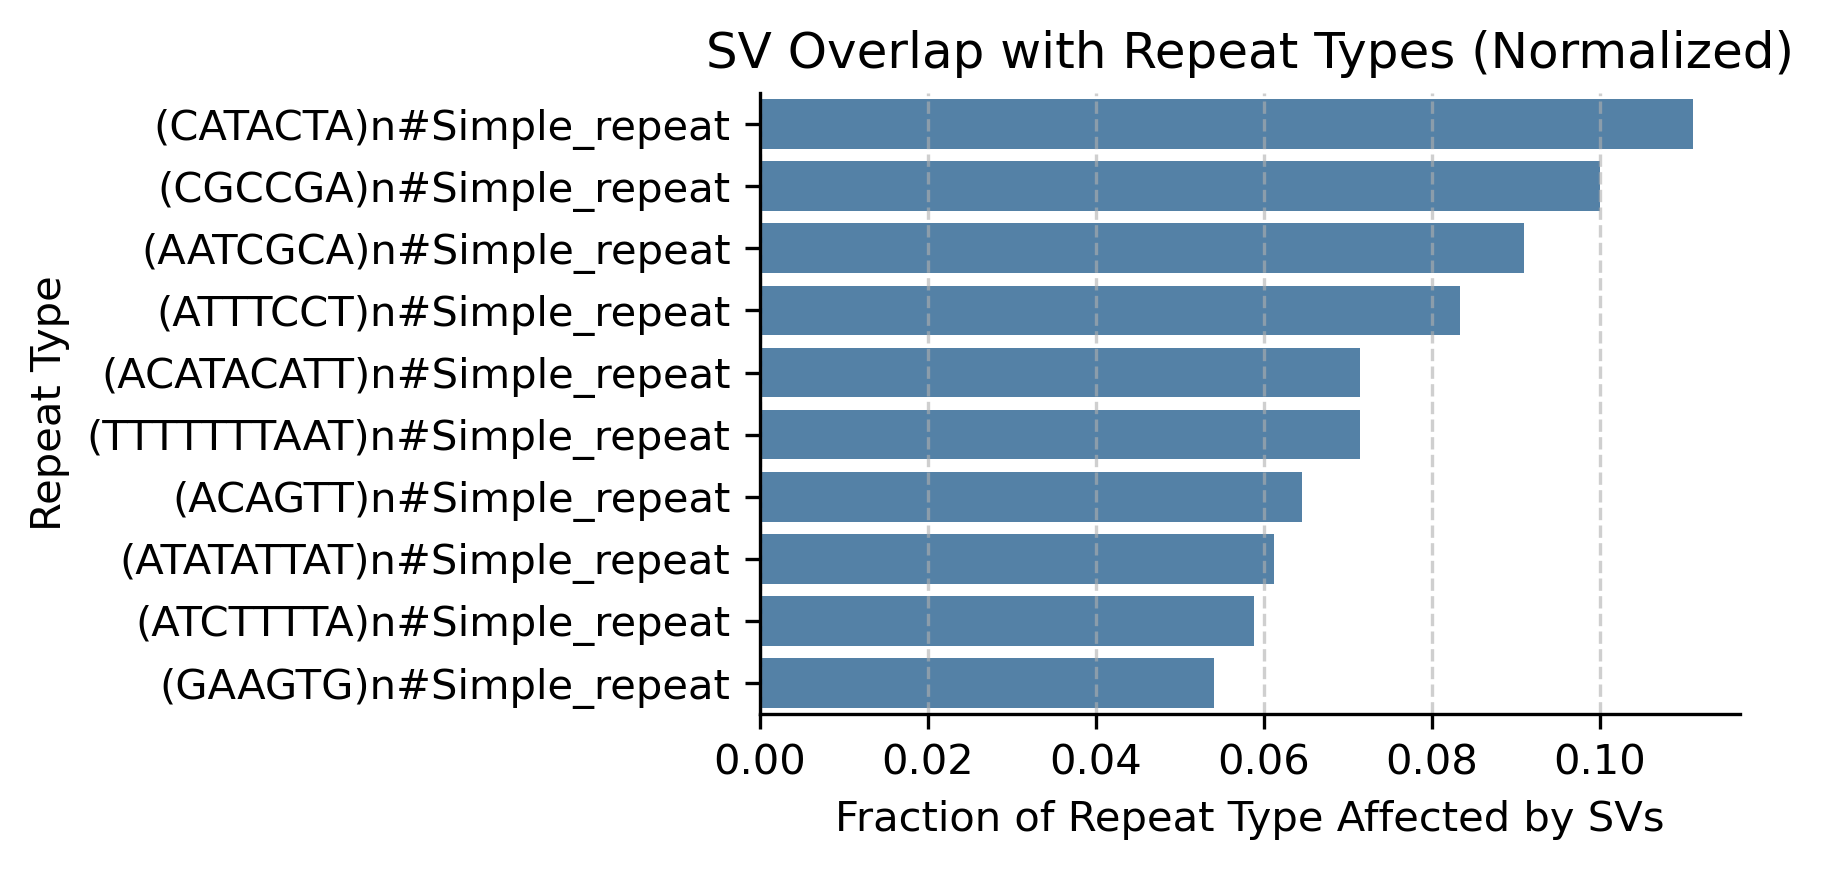

In [48]:

# Sort for better visualization
df = df.sort_values("normalized_overlap", ascending=False)

# Plot
fig, ax = plt.subplots(figsize=(6, 3), dpi=300)
sns.barplot(data=df.iloc[:10,:], y="feature", x="normalized_overlap", color="steelblue", ax=ax)
ax.set_xlabel("Fraction of Repeat Type Affected by SVs")
ax.set_ylabel("Repeat Type")
ax.set_title("SV Overlap with Repeat Types (Normalized)")
sns.despine()
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.tight_layout()

# Save the figure
# plt.savefig("/path/to/output/repeat_sv_overlap_normalized.png")

plt.show()


In [127]:
# taking a look at genes

gene_df

,chrom,start,end,svtype,feature_chrom,feature_start,feature_end,feature,feature_type,sv_length
0,NC_037638.1,58769,58850,DEL,NC_037638.1,45527,79393,gene,gene,81
1,NC_037638.1,58769,58850,DEL,NC_037638.1,45527,79393,transcript,gene,81
2,NC_037638.1,58769,58850,DEL,NC_037638.1,45527,60171,transcript,gene,81
3,NC_037638.1,150850,150851,BND,NC_037638.1,134889,241308,gene,gene,1
4,NC_037638.1,150850,150851,BND,NC_037638.1,134889,241308,transcript,gene,1
...,...,...,...,...,...,...,...,...,...,...
180053,NC_001566.1,0,16343,DUP,NC_001566.1,14731,15517,gene,gene,16343
180054,NC_001566.1,0,16343,DUP,NC_001566.1,14731,15517,transcript,gene,16343
180055,NC_001566.1,0,16343,DUP,NC_001566.1,14731,15517,exon,gene,16343
180056,NC_001566.1,3424,3425,INS,.,-1,-1,.,gene,1


In [129]:
# Load baseline genes
genes_baseline = pd.read_csv(
    "/Users/bebr1814/projects/chuong_bees/data/20250211_1135_P2S-00613-A_PBA08559_66fdcccd/uncorrected_fastq/alignments_amelhav3.1/annotation_overlaps/gene_annots.bed",
    sep='\t', header=None
)
genes_baseline.columns = ["chrom", "start", "end", "feature"]
genes_baseline

,chrom,start,end,feature
0,NC_037638.1,9272,12174,gene
1,NC_037638.1,9273,12174,transcript
2,NC_037638.1,11811,12174,exon
3,NC_037638.1,11053,11121,exon
4,NC_037638.1,10912,10994,exon
...,...,...,...,...
581971,NC_001566.1,14661,14731,transcript
581972,NC_001566.1,14661,14731,exon
581973,NC_001566.1,14731,15517,gene
581974,NC_001566.1,14731,15517,transcript
